In [1]:
%load_ext autoreload

In [1]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [2]:
from monetio.models import hysplit

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [3]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
import utilvolc.ash_eval as ae
from utilhysplit.evaluation import ensemble_tools
from utilhysplit.evaluation import statmain

In [4]:
# SETUP
# location of volcano
bezyloc = [160.587,55.978]

tag ='M'
ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
ens.append('gec00')
#ens=['gep04','gep03']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = '../data'
fnamelist  = ['xrfile.invbezy{}_{}.nc'.format(tag,x) for x in ens]
tdirlist = [tdir for x in ens]

#----------------------------------------------------------------
# configuration file for run
configdir = '../RunM/'
configfile = '/config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
# vdir = '/pub/ECMWF/JPSS/VOLCAT/Bezymianny/Ash/pc_corrected_3/'
vdir = '../data/volcat/'
# volcano id to locate
vid = 'v300250'

#-----------------------------------------------------------------
# Location of inverse algorithm output
cdir = '../Run{}'.format(tag)
wdir = '../Run{}'.format(tag,tag)
sdir = os.path.join(wdir, 'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------
# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
# Cylindrical source (1km diameter)
# Location 
cyldir = '/hysplit-users/alicec/projects/inverse/BezyCyl/'
#
execdir = '/hysplit-users/alicec/inverse/Inverse_240/'

#---------------------------------------------------------------------
# Location to write graphics files
gdir = './graphics/'
graphicstype = 'png'


In [5]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,17):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

UsageError: Line magic function `%autoreload` not found.


In [ ]:
aeval = ae.AshEval(sdir,'RunM4.nc',vdir,vid,configdir=configdir,configfile=configfile)

In [ ]:
# calculates mass loading and stores it in the self.massload attribute.
# NOTE - this is NOT clipped to the same domain as the volcat data.
# NOTE - massload matched to VOLCAT is also in the cdump_hash attribute. Do we need this as well?
aeval.calc_massload()

In [ ]:
# Add volcat data to the aeval object.
# This reads in the regridded files and then prepares the time average.
# It also checks that volcat and HYSPLIT output are on the same grid
# and makes sure they cover the same domain.
%autoreload
for drange in dlist:
    print(drange)
    a,b = aeval.prepare_one_time(drange)

In [ ]:
aeval.volcat_avg_hash.keys()

# VOLCAT CDF

In [6]:
# Plots CDF of composite VOLCAT data as function of time.
# Colors repeat every 5 hours.
sns.set()
def add_lines(ax):
    x1 = 0.2
    ax.plot((x1,x1),(0,1),'-k')
    x1 = 2.0
    ax.plot((x1,x1),(0,1),'-k')
    x1 = 20.0
    ax.plot((x1,x1),(0,1),'-k')

sns.set_style("whitegrid")
%autoreload
aeval.volcat_cdf_plot(threshold=0.00001)
ax = plt.gca()
ax.set_xscale('log')
ax = plt.gca()
add_lines(ax)
ax.set_xlabel('Mass Loading g m$^{-2}$')
plt.tight_layout()
plt.savefig('volcat_1hrave_cdf.png')


UsageError: Line magic function `%autoreload` not found.


In [7]:
%autoreload
# one ensemble member at all times.
tii=5
timelist = aeval.massload.time.values
enslist = aeval.massload.ens.values
enslist = [enslist[tii]]
#timelist = [aeval.massload.time.values[tii]]
print(timelist)
#print(enslist)
threshold = 0.2
# CDF with pixel matching. Threshold will be different for every ensemble member as well as fo
# volcat data. First threshold is applied to VOLCAT data. Number of VOLCAT pixels above threshold
# is counted.
use_pixel_match=False
aeval.mass_cdf_plot(timelist,enslist,threshold=threshold,use_pixel_match=use_pixel_match)
ax = plt.gca()
#add_lines(ax)
plt.show()
#use_pixel_match=False
#kslist = aeval.mass_cdf_plot(timelist,enslist,threshold=threshold,use_pixel_match=use_pixel_match)
#ax = plt.gca()
#add_lines(ax)

UsageError: Line magic function `%autoreload` not found.


In [ ]:
%autoreload
# all ensemble members at one time.
tii=6  # time index
timelist = aeval.massload.time.values
enslist = aeval.massload.ens.values
timelist = [aeval.massload.time.values[tii]]
#print(timelist)
#print(enslist)
aeval.mass_cdf_plot(timelist,enslist,threshold=0.1)
ax = plt.gca()
#add_lines(ax)

[numpy.datetime64('2020-10-22T04:00:00.000000000')]


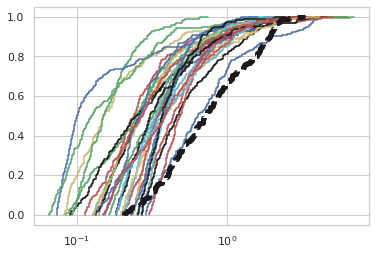

<Figure size 432x288 with 0 Axes>

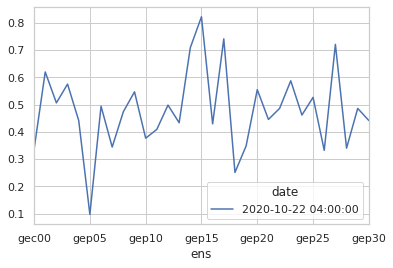

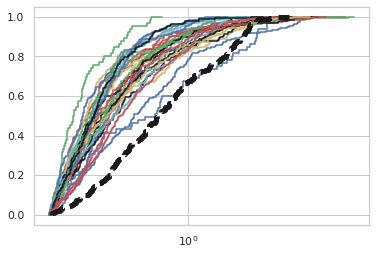

<Figure size 432x288 with 0 Axes>

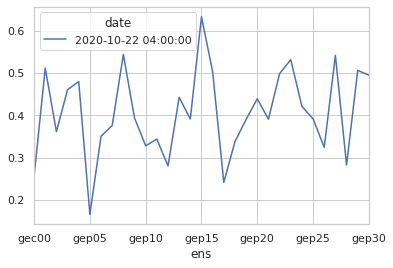

In [19]:
%autoreload
# CDF for all ensemble members at one time.
tii=8  # choose time index
timelist = aeval.massload.time.values
enslist = aeval.massload.ens.values
enslist = None
timelist = [aeval.massload.time.values[tii]]
print(timelist)
#print(enslist)
threshold = 0.2
# CDF with pixel matching. Threshold will be different for every ensemble member as well as fo
# volcat data. First threshold is applied to VOLCAT data. Number of VOLCAT pixels above threshold
# is counted.
use_pixel_match=True
aeval.mass_cdf_plot(timelist,enslist,threshold=threshold,use_pixel_match=use_pixel_match)
ax = plt.gca()
#add_lines(ax)
plt.show()
# CDF with no pixel matching. Thresholds are the same for every ensemble member and volcat data.
# number of above threshold pixels will be different.
use_pixel_match=False
kslist = aeval.mass_cdf_plot(timelist,enslist,threshold=threshold,use_pixel_match=use_pixel_match)
ax = plt.gca()
#add_lines(ax)



2020-10-22T02:00:00.000000000


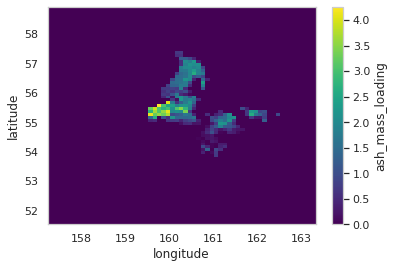

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


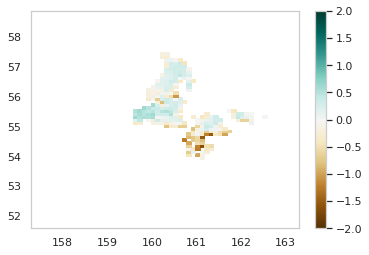

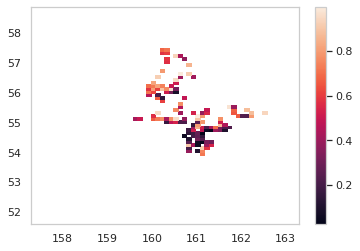

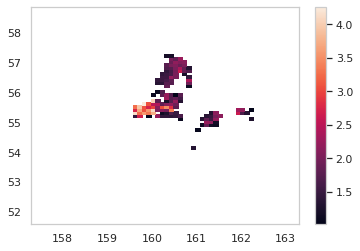

133 138


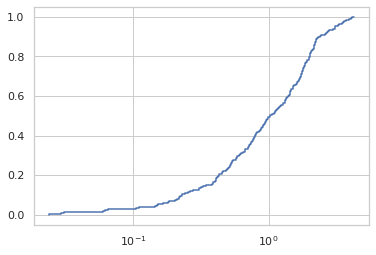

In [23]:
iii=6
aeval.volcat_avg_hash[iii].plot.pcolormesh(x='longitude',y='latitude')
print(aeval.cdump.time.values[iii])
plt.show()
temp = aeval.volcat_avg_hash[iii]
thresh=1
temp2 = np.where(temp.values>=thresh,np.nan,temp)
temp2 = np.where(temp2==0,np.nan,temp2)
temp3 = np.where(temp.values<thresh,np.nan,temp)

cb = plt.pcolormesh(temp.longitude, temp.latitude, np.log10(temp.values),cmap='BrBG',vmin=-2, vmax=2)
plt.colorbar(cb)
plt.show()

cb = plt.pcolormesh(temp.longitude, temp.latitude, temp2)
plt.colorbar(cb)
plt.show()
cb = plt.pcolormesh(temp.longitude, temp.latitude, temp3)
plt.colorbar(cb)
plt.show()
a2 = [x for x in temp2.flatten() if ~np.isnan(x)]
a3 = [x for x in temp3.flatten() if ~np.isnan(x)]
print(len(a2),len(a3))

vals = temp.values.flatten()
vals = np.where(vals==0,np.nan,vals)
cdf,y = statmain.nancdf(vals)
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
ax.step(cdf,y)
ax.set_xscale('log')
plt.show()

tii 8
tii 8


/hysplit-users/alicec/utilhysplit/utilvolc/ash_eval.py:251: RuntimeWarning: invalid value encountered in less
  vpi = vvals < 0.001


tii 8


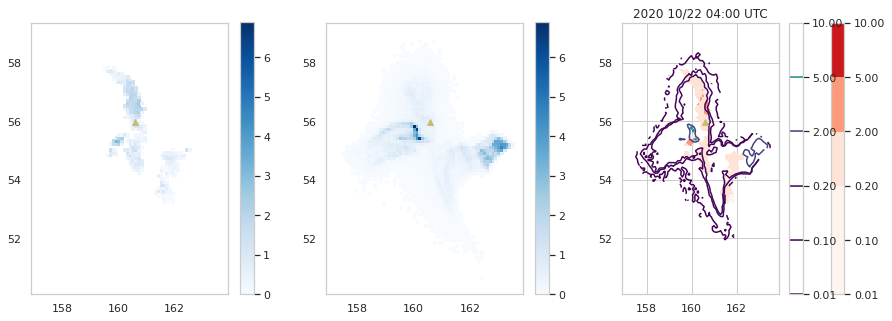

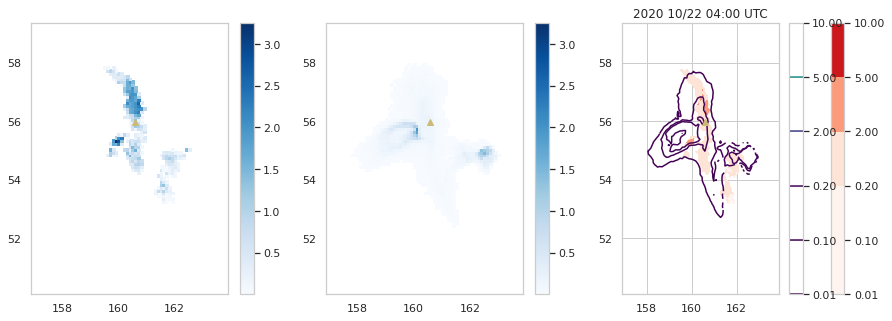

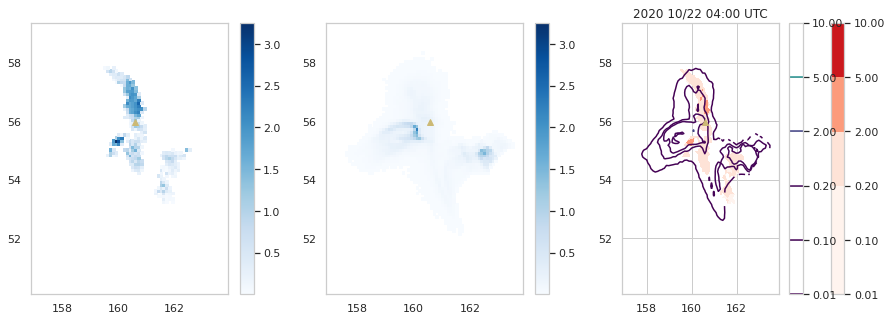

In [24]:
# compare ensemble max, median and mean to VOLCAT data.
# left composited volcat data.
# middle HYSPLIT output
# Right - filled contours are VOLCAT and unfilled contours are HYSPLIT.
tii=8 # time period
fig = aeval.compare_forecast(aeval.massload.max(dim='ens').isel(time=tii),vloc=bezyloc)
fig = aeval.compare_forecast(aeval.massload.median(dim='ens').isel(time=tii),vloc=bezyloc)
fig = aeval.compare_forecast(aeval.massload.mean(dim='ens').isel(time=tii),vloc=bezyloc)

In [33]:
%autoreload
#tii=10
#hxr = aeval.cdump_hash[tii]
#volcat = aeval.volcat_avg_hash[tii]
#ae.calc_stats_function(hxr, volcat,[0.01,0.1,0.2,0.5,1,2])

In [26]:
from utilhysplit.evaluation import plume_stat
cs = plume_stat.CalcScores(hxr.mean('ens'),volcat,threshold=0.2)

# FSS

In [37]:
%autoreload
tii=5
threshold=0.1
volcat=[]
forecast=[]
# look at these time periods.
for tii in [4,5,6,7,8,9,10,11,12,13,14,15,16]:
    volcat.append(aeval.volcat_avg_hash[tii])
    forecast.append(aeval.cdump_hash[tii])

dft = ensemble_tools.ens_time_fss(forecast,volcat,threshold=threshold,neighborhoods=[1,3,5,7,9,11,13,15,17,19,21],plot=False)

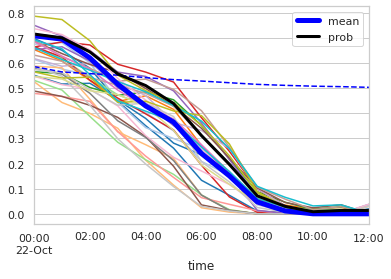

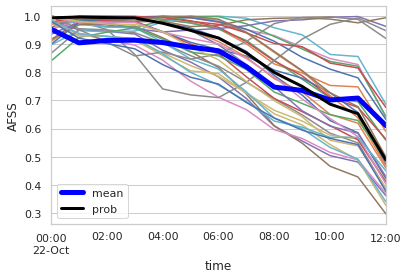

In [38]:
%autoreload
# plot fss as a function of time.
ensemble_tools.plot_ens_fss_ts(dft,nval=3)
plt.show()
# plot the AFSS which is a measure of frequency bias.
# value of 1 is no bias.
afss = ensemble_tools.plot_afss_ts(dft)

In [9]:
# Checking the pixel matching
%autoreload
tii=8
pm = False
print(aeval.cdump.time.values[tii])

volcat = aeval.volcat_avg_hash[tii]
forecast = aeval.cdump_hash[tii]
nb = np.arange(1,21,2)
if tii <= 8:
    nb = np.append(nb,[31,41,51])
else:
    nb = np.append(nb,[31,41,51,61,61,81,91,101])
thresh=0.1
# GET df1 - which is FSS at one time.
msc, psc, df1 = ensemble_tools.ens_fss(forecast,volcat,threshold=0.1,neighborhoods=nb,return_objects=True,pixel_match=pm)

2020-10-22T04:00:00.000000000


KeyError: 8

In [54]:
datedf1 = pd.to_datetime(aeval.cdump.time.values[tii])
timetag = datedf1.strftime("%Y%m%dT%H")
if pm: timetag + '_pm'


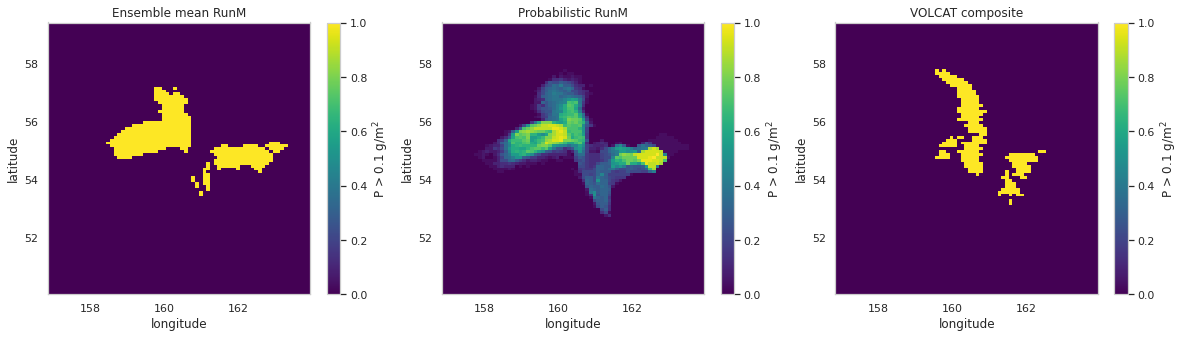

In [55]:
fig = plt.figure(1,figsize=[20,5])
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
chash = {'label': 'P > {} g/m$^2$'.format(thresh)}
msc.binxra2.plot.pcolormesh(ax=ax1,x='longitude',y='latitude', cbar_kwargs=chash)
psc.binxra2.plot.pcolormesh(ax=ax2,x='longitude',y='latitude', cbar_kwargs=chash)
psc.binxra1.plot.pcolormesh(ax=ax3,x='longitude',y='latitude',cbar_kwargs=chash)
ax1.set_title('Ensemble mean RunM')
ax2.set_title('Probabilistic RunM')
ax3.set_title('VOLCAT composite')
plt.savefig('binary_fields_runM_{}'.format(timetag))

[0.54225352]


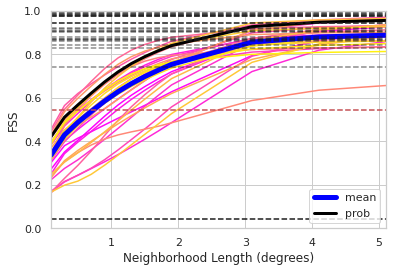

In [56]:
# Plot FSS vs N for one time.
%autoreload
print(df1['uniform'].unique())
ensemble_tools.plot_ens_fss(df1,sizemult=0.1)
ax = plt.gca()
ax.set_ylim([0,1])
ax.set_ylabel('FSS')
ax.set_xlabel('Neighborhood Length (degrees)')
plt.savefig('FSS_runM_{}'.format(timetag))

array([0.98634022, 0.98913935, 0.99765709, 0.87881657, 0.92307692,
       0.99808877, 0.90427276, 0.86020909, 0.97958074, 0.94501142,
       0.99934857, 0.98507661, 0.94265787, 0.94374352, 0.98205705,
       0.84340742, 0.74094315, 0.86907345, 0.90773526, 0.99969947,
       0.97530532, 0.91801263, 0.99491146, 0.97407431, 0.99905527,
       0.87176461, 0.86552747, 0.82760903, 0.97711163, 0.90600603,
       0.97477182])

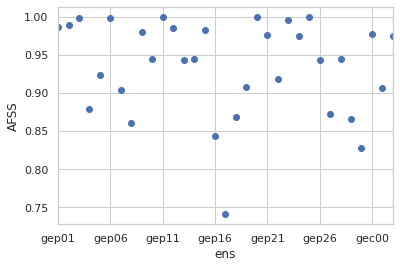

In [58]:
%autoreload
ensemble_tools.plot_afss(df1)
df1['afss'].unique()

# ROC

In [59]:
%autoreload
xlist, ylist = scores.calc_roc(clip=True)
xlist2,ylist2 = scores.calc_roc(clip=False)
plt.plot(xlist,ylist,'--ko')
plt.plot(xlist2,ylist2,'--ro')
plt.show()
plume_stat.plot_roc(xlist,ylist)
plume_stat.plot_roc(xlist2,ylist2)

NameError: name 'scores' is not defined

In [35]:
%autoreload
print(cs.totalpts)
csihash = cs.calc_csi()
fssdf = cs.calc_fss(szra=[3,9,11,13,15,17,21,27,31,41,51,61,99], makeplots=False)
print(fssdf)

9213
CSI: 0.016 POD: 0.037 FAR: 0.971 F  : 0.022
    Nlen       FBS   FBS_ref       FSS    random   uniform      afss
3      3  0.025934  0.027255  0.048478  0.017692  0.517692  0.968742
9      9  0.011691  0.013362  0.125093  0.017692  0.517692  0.968742
11    11  0.009181  0.011174  0.178386  0.017692  0.517692  0.968742
13    13  0.007220  0.009490  0.239228  0.017692  0.517692  0.968742
15    15  0.005708  0.008172  0.301526  0.017692  0.517692  0.968742
17    17  0.004545  0.007132  0.362763  0.017692  0.517692  0.968742
21    21  0.002893  0.005606  0.484002  0.017692  0.517692  0.968742
27    27  0.001465  0.004136  0.645889  0.017692  0.517692  0.968742
31    31  0.000974  0.003491  0.720898  0.017692  0.517692  0.968742
41    41  0.000463  0.002450  0.811025  0.017692  0.517692  0.968742
51    51  0.000264  0.001799  0.853380  0.017692  0.517692  0.968742
61    61  0.000160  0.001358  0.882246  0.017692  0.517692  0.968742
99    99  0.000024  0.000507  0.952025  0.017692  0.51

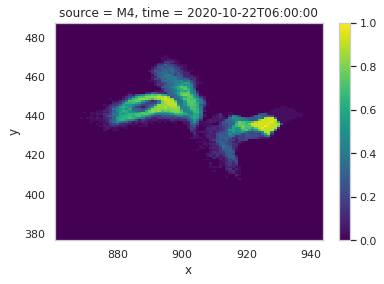

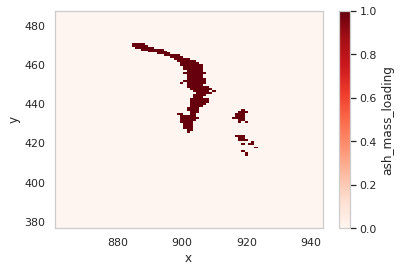

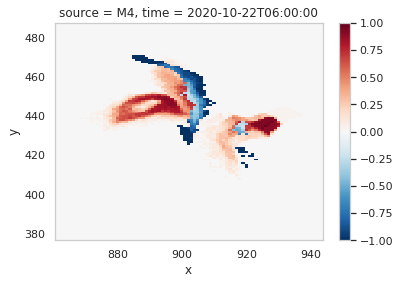

9213
<xarray.DataArray ()>
array(0.03883735)
Coordinates:
    source   <U2 'M4'
    time     datetime64[ns] 2020-10-22T06:00:00
<xarray.DataArray ()>
array(0.03883735)
Coordinates:
    source   <U2 'M4'
    time     datetime64[ns] 2020-10-22T06:00:00


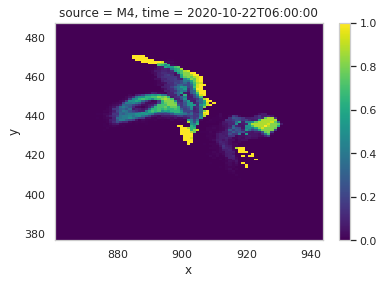

In [28]:
%autoreload
from utilhysplit.evaluation import ensemble_tools
from utilhysplit.evaluation.plume_stat import calc_bs
thresh=0.1
atl = ensemble_tools.ATL(hxr,norm=True,thresh=thresh)
atl.plot.pcolormesh()
volcat_binary = xr.where(volcat>=thresh,1.,0.)
plt.show()
volcat_binary.plot.pcolormesh(cmap='Reds')
plt.show()
diff = atl - volcat_binary
diff.plot.pcolormesh()
diff_sq = diff*diff
plt.show()
diff_sq.plot.pcolormesh()
N = np.size(diff_sq)
print(N)
print(diff_sq.sum() / N)
print(calc_bs(volcat_binary,atl))


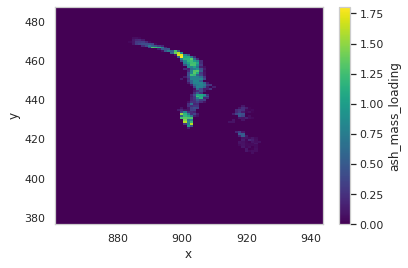

In [30]:
volcat.plot.pcolormesh()

tii 8
tii 8


/hysplit-users/alicec/utilhysplit/utilvolc/ash_eval.py:251: RuntimeWarning: invalid value encountered in less
  vpi = vvals < 0.001


tii 8


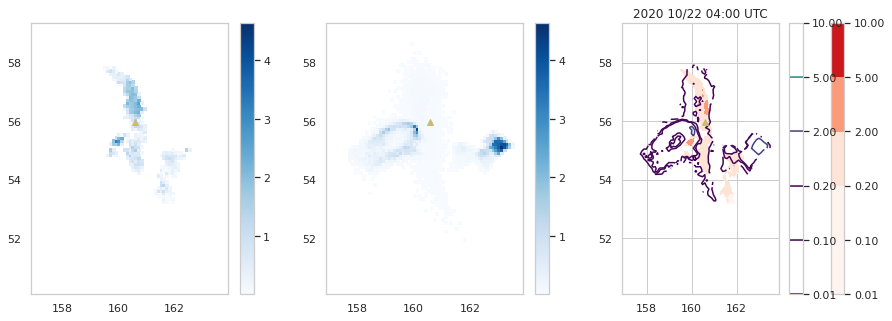

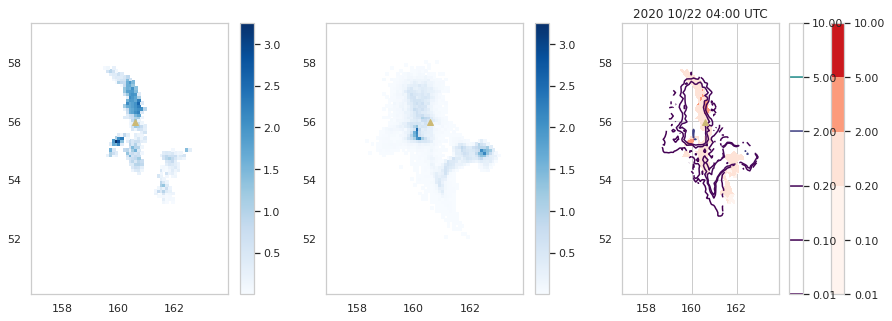

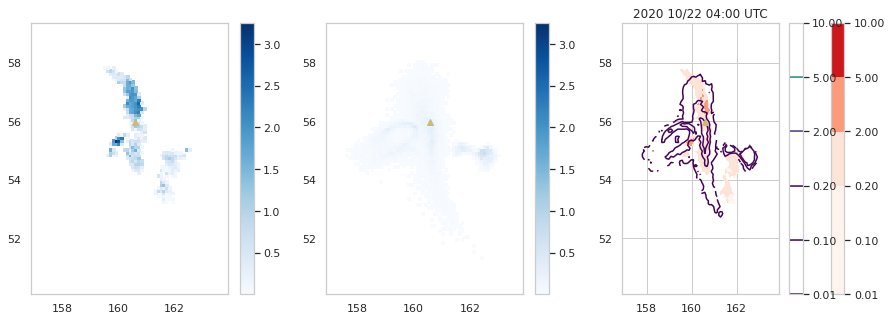

In [31]:
# look at ouptut from different ensemble members
tii=8
enslist = ['gep05','gep19','gep15']
fig = aeval.compare_forecast(aeval.massload.sel(ens=enslist[0]).isel(time=tii),vloc=bezyloc)
fig = aeval.compare_forecast(aeval.massload.sel(ens=enslist[1]).isel(time=tii),vloc=bezyloc)
fig = aeval.compare_forecast(aeval.massload.sel(ens=enslist[2]).isel(time=tii),vloc=bezyloc)

In [202]:
scores.calc_csi()

CSI:  0.4876543209876543 POD:  0.6991150442477876 FAR:  0.3828125


{'hits': <xarray.DataArray (y: 47, x: 48)>
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])
 Coordinates:
   * y        (y) int64 424 425 426 427 428 429 430 ... 465 466 467 468 469 470
   * x        (x) int64 873 874 875 876 877 878 879 ... 915 916 917 918 919 920
     time     datetime64[ns] 2020-10-22T01:00:00,
 'misses': <xarray.DataArray (y: 47, x: 48)>
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])
 Coordinates:
     longitude  (y, x) float64 157.8 157.9 158.0 158.1 ... 162.3 162.4 162.5
     latitude   (y, x) float64 53.33 53.33 53.33 53.33 ... 57.93 57.93 57.93
   * y          (y) int6

In [171]:
scores.calc_fss(makeplots=True)

ValueError: operands could not be broadcast together with shapes (179,285) (193,393) 

In [190]:
diameter = 20e3
area = np.pi*(diameter/2)**2
print('{:2e}'.format(area))

3.141593e+08


# Plume Stat

In [62]:
# Trying out new probabilistic capabilities in plume_stat
%autoreload
tii = 8
volcat = aeval.volcat_avg_hash[tii]
forecast = aeval.cdump_hash[tii]
probscores = plume_stat.CalcScores(volcat, forecast,threshold=0.1,probabilistic=True)


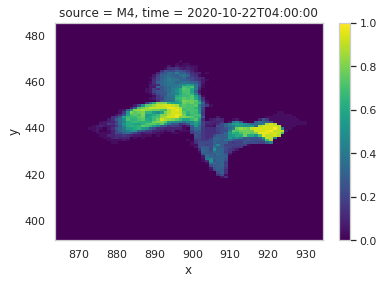

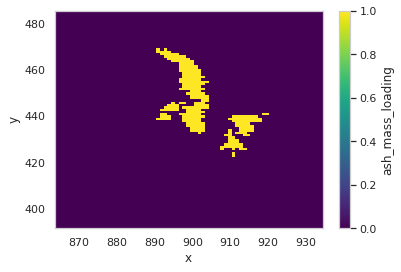

In [67]:
probscores.binxra2.plot.pcolormesh()
plt.show()
probscores.binxra1.plot.pcolormesh()

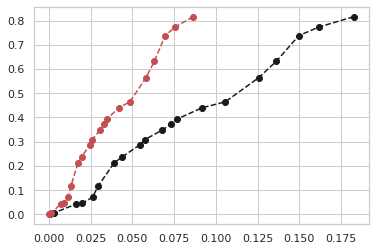

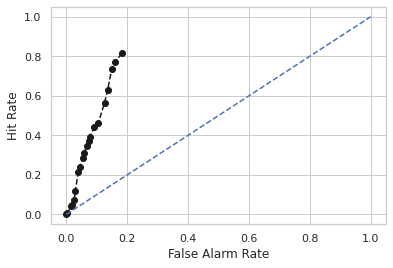

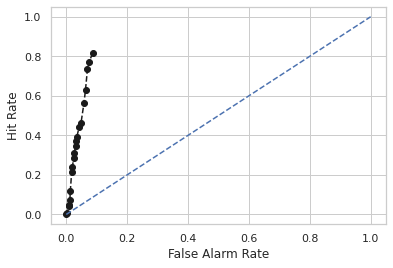

In [75]:
%autoreload
pm=True
datedf1 = pd.to_datetime(aeval.cdump.time.values[tii])
timetag = datedf1.strftime("%Y%m%dT%H")
if pm: timetag + '_pm'

xlist, ylist = probscores.calc_roc(clip=True)
xlist2,ylist2 = probscores.calc_roc(clip=False)
plt.plot(xlist,ylist,'--ko')
plt.plot(xlist2,ylist2,'--ro')
plt.show()
plume_stat.plot_roc(xlist,ylist)
plt.savefig('ROC_runM_{}'.format(timetag))
plume_stat.plot_roc(xlist2,ylist2)


In [87]:
fname = '/hysplit-users/alicec/projects/testing/area/allison/cdump.old'
import os
os.path.isfile(fname)
dset = hysplit.open_dataset(fname)

In [88]:
dset.attrs

{'Starting Locations': [(27.247, 140.874, 25.0), (27.247, 140.874, 25.0)],
 'Source Date': [datetime.datetime(2020, 8, 1, 0, 0),
  datetime.datetime(2020, 8, 1, 0, 0)],
 'Meteorological Model ID': 'GFSQ',
 'Number Start Locations': 2,
 'Number of Levels': 14,
 'Level top heights (m)': array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
        10000, 11000, 12000, 13000, 14000], dtype=int32),
 'Number of Species': 1,
 'Species ID': ['p006'],
 'Sampling Time': datetime.timedelta(seconds=3600),
 'sample time hours': 1.0,
 'time description': 'start of sampling time period',
 'Concentration Grid': {'Number Lat Points': 901,
  'Number Lon Points': 1801,
  'Latitude Spacing': 0.1,
  'Longitude Spacing': 0.1,
  'llcrnr longitude': 50.873993,
  'llcrnr latitude': -17.753},
 'Coordinate time description': 'Beginning of sampling time'}

In [15]:
from utilhysplit.evaluation import reliability

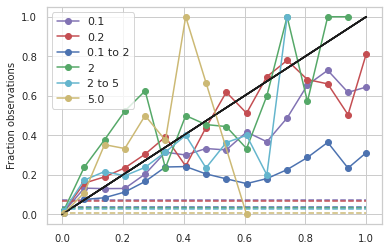

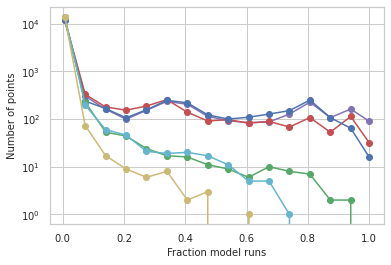

In [64]:
%autoreload
num=15
threshlist = [0.1,0.2,[0.1,2],2,[2,5],5.0]
clrs = ['-mo','-ro','-bo','-go','-co','-yo']
rclist = []
labels = []
fig = plt.figure(1)
ax = fig.add_subplot(1,1,1)
fig2 = plt.figure(2)
ax2 = fig2.add_subplot(1,1,1)
for thresh in threshlist:
    if isinstance(thresh,(int,float)):
        labels.append(str(thresh))
    else:
        labels.append('{} to {}'.format(thresh[0],thresh[1]))
    rclist.append(reliability.ReliabilityCurve(thresh,num))
for tii in [2,3,4,5,6]:
#for tii in [7,8,9,10]:
    volcat = aeval.volcat_avg_hash[tii]
    forecast = aeval.cdump_hash[tii]
    for jjj, rc in enumerate(rclist):
        dfin = rc.reliability_add_xra(volcat,forecast,fill=True)

for jjj, rc in enumerate(rclist):
    reliability.sub_reliability_plot(rc,ax,clr=clrs[jjj],fs=10,label=labels[jjj])
    reliability.sub_reliability_number_plot(rc,ax2,clr=clrs[jjj],fs=10,label=labels[jjj])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,labels,loc='upper left')


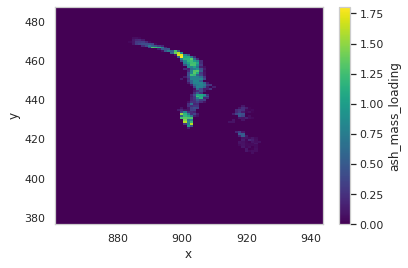

In [31]:
volcat.plot.pcolormesh()

# Talagrand diagram

In [129]:
tii=4
volcat = aeval.volcat_avg_hash[tii]
forecast = aeval.cdump_hash[tii] 

ROW ens
obs      0.000000
gep26    0.000000
gep24    0.000000
gep19    0.000000
gep04    0.000000
gep13    0.000000
gep11    0.000000
gep10    0.000000
gep12    0.000039
gep18    0.000309
gep30    0.000329
gec00    0.000781
gep07    0.000992
gep09    0.002250
gep23    0.002893
gep29    0.003158
gep16    0.003179
gep08    0.003664
gep20    0.004616
gep17    0.005871
gep06    0.006093
gep22    0.006219
gep15    0.006227
gep28    0.008730
gep02    0.010692
gep14    0.011502
gep25    0.020243
gep27    0.027061
gep03    0.030351
gep21    0.034671
gep01    0.062099
gep05    0.145643
Name: 876_439, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep13    0.000000
gep11    0.000000
gep18    0.000000
gep24    0.000000
gep19    0.000000
gep26    0.000000
gep04    0.000000
gep30    0.000331
gep28    0.000898
gep07    0.001032
gep29    0.001055
gep16    0.001938
gep20    0.002007
gep17    0.002946
gep23    0.003881
gep12    0.003931
gep06    0.004098
gep09    0.004519
gep10    0.004756
gec00  

Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.000073
gep24    0.000099
gep19    0.000303
gep12    0.000332
gep13    0.000347
gep04    0.000770
gec00    0.003487
gep07    0.003850
gep30    0.004557
gep16    0.006148
gep08    0.009590
gep10    0.009667
gep18    0.010710
gep14    0.012207
gep22    0.012367
gep09    0.017158
gep17    0.020302
gep28    0.020639
gep26    0.020825
gep29    0.025266
gep23    0.027524
gep15    0.027767
gep20    0.029357
gep27    0.034316
gep06    0.035474
gep02    0.048529
gep25    0.060685
gep01    0.082672
gep03    0.114255
gep21    0.155889
gep05    0.157726
Name: 881_438, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep13    0.000000
gep19    0.000080
gep24    0.000104
gep04    0.000433
gep11    0.000570
gep12    0.003991
gep30    0.004405
gep26    0.006420
gep10    0.007039
gep18    0.014403
gep07    0.015864
gep29    0.016802
gep16    0.017412
gep14    0.026744
gep20    0.032065
gep08    0.032153
gep23    0.032820
gep15    0.033674
gep17    0.036

ROW ens
obs      0.000000
gep04    0.000000
gep24    0.000024
gep19    0.000234
gep13    0.001251
gep11    0.002126
gep17    0.004048
gep07    0.005590
gep22    0.006575
gep23    0.008564
gep27    0.009215
gep06    0.011626
gep30    0.012780
gep08    0.013066
gep20    0.017961
gep16    0.020297
gep09    0.021443
gep29    0.024265
gep26    0.024551
gep15    0.024746
gep12    0.025495
gep10    0.030729
gep14    0.048362
gep18    0.050757
gep28    0.056828
gep02    0.063194
gep01    0.081435
gec00    0.083444
gep21    0.114806
gep25    0.131228
gep03    0.151871
gep05    0.186484
Name: 883_448, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.000000
gep11    0.000000
gep04    0.000000
gep24    0.000000
gep12    0.000401
gep13    0.000601
gep29    0.001306
gep28    0.001804
gep07    0.002716
gep02    0.003648
gep16    0.004627
gep23    0.004782
gep20    0.005940
gep03    0.007573
gep06    0.009578
gep18    0.011164
gec00    0.011229
gep08    0.016039
gep14    0.017082
gep09  

Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.020597
gep11    0.028289
gep19    0.068394
gep13    0.087695
gep27    0.121943
gep04    0.129044
gep17    0.133465
gep26    0.220036
gep07    0.256926
gep15    0.300306
gep18    0.302539
gep30    0.316356
gep14    0.351223
gep16    0.406694
gep23    0.418533
gep08    0.444791
gep20    0.450141
gep02    0.460432
gep12    0.508751
gep09    0.644426
gep06    0.664175
gep29    0.678693
gep10    0.839236
gep28    0.852596
gep03    0.937378
gep01    0.969806
gep21    1.012220
gep22    1.108233
gec00    1.123734
gep25    1.142020
gep05    1.766199
Name: 886_447, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.013625
gep13    0.022824
gep11    0.028135
gep19    0.076688
gep04    0.102250
gep17    0.118924
gep30    0.151717
gep27    0.161315
gep07    0.175246
gep26    0.196403
gep18    0.248287
gep16    0.305420
gep12    0.327147
gep15    0.335008
gep23    0.350179
gep14    0.378880
gep08    0.392621
gep20    0.445583
gep06    0.467

Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.030985
gep27    0.041593
gep13    0.060453
gep11    0.060785
gep19    0.061669
gep17    0.111638
gep04    0.154159
gep30    0.210316
gep15    0.211504
gep26    0.239542
gep07    0.263648
gep18    0.270216
gep14    0.270673
gep16    0.323419
gep12    0.384195
gep23    0.456634
gep08    0.471615
gep09    0.530058
gep20    0.546234
gep29    0.556591
gep02    0.576302
gep06    0.577581
gep10    0.604885
gep28    0.607269
gep01    0.687630
gep22    0.917913
gep05    0.964519
gec00    1.096581
gep21    1.200250
gep25    1.229971
gep03    1.310592
Name: 888_449, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.010668
gep27    0.016876
gep11    0.020488
gep13    0.024962
gep17    0.028669
gep15    0.037424
gep24    0.052386
gep14    0.056708
gep12    0.063188
gep07    0.078331
gep04    0.083380
gep16    0.099262
gep20    0.102091
gep23    0.103329
gep30    0.115120
gep02    0.128989
gep29    0.129936
gep10    0.156174
gep08    0.163

Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep14    0.000000
gep03    0.000249
gep25    0.000489
gep20    0.000713
gep11    0.001230
gep23    0.001235
gep27    0.001245
gep21    0.003514
gep05    0.003774
gep15    0.004325
gep09    0.004633
gep02    0.005362
gep22    0.005369
gep12    0.005632
gep17    0.020764
gep13    0.024406
gec00    0.024580
gep26    0.029366
gep06    0.030047
gep08    0.038588
gep10    0.040744
gep24    0.067126
gep29    0.074722
gep18    0.092811
gep16    0.094839
gep28    0.120706
gep19    0.133001
gep30    0.149086
gep07    0.189617
gep04    0.192827
Name: 889_460, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep02    0.000000
gep27    0.000000
gep14    0.000000
gep03    0.000496
gep20    0.000817
gep25    0.001433
gep01    0.001665
gep11    0.002467
gep12    0.003390
gep15    0.004032
gep09    0.004643
gep23    0.004739
gep22    0.005167
gep05    0.007932
gep13    0.010817
gep17    0.013810
gep26    0.018345
gep21    0.020020
gep10    0.030

Rank 31 1.2537983655929565
ROW ens
gep27    0.009599
gep17    0.024747
gep19    0.042201
gep24    0.050107
gep13    0.056217
gep11    0.062639
gep14    0.117386
gep15    0.119469
gep03    0.147984
gep04    0.194363
gep26    0.242230
gep05    0.245566
gep18    0.248466
gep21    0.258767
gep01    0.286856
gep23    0.325197
gep07    0.331610
gep08    0.363214
gep12    0.373287
gep30    0.408584
gep02    0.409511
gep06    0.416776
gep09    0.418273
gep25    0.419494
gep20    0.442152
gep22    0.449561
gep16    0.564571
gep29    0.683546
gep10    0.708217
gep28    0.729671
gec00    0.961268
obs      2.473306
Name: 891_444, dtype: float64
Rank 31 2.47330641746521
ROW ens
obs      0.000000
gep27    0.004325
gep17    0.005252
gep14    0.008709
gep15    0.037297
gep03    0.042573
gep01    0.096016
gep11    0.107307
gep05    0.114653
gep19    0.136809
gep20    0.156567
gep21    0.159591
gep09    0.160782
gep13    0.173960
gep25    0.224162
gep22    0.257460
gep23    0.275907
gep02    0.293035
ge

ROW ens
obs      0.000000
gep25    0.001991
gep14    0.003159
gep01    0.005758
gep03    0.006554
gep20    0.008218
gep12    0.011228
gep23    0.012303
gep09    0.015297
gep27    0.019689
gep22    0.020039
gep21    0.023273
gep05    0.024415
gep15    0.027079
gep10    0.035226
gep02    0.037671
gep17    0.044723
gep11    0.047732
gec00    0.053905
gep06    0.086790
gep26    0.092972
gep13    0.107904
gep24    0.109945
gep29    0.126732
gep28    0.138610
gep16    0.211725
gep08    0.228085
gep07    0.243702
gep30    0.251682
gep18    0.285998
gep19    0.296207
gep04    0.373463
Name: 892_454, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep25    0.001835
gep14    0.003454
gep03    0.003765
gep20    0.007764
gep01    0.007813
gep12    0.008866
gep23    0.012254
gep09    0.015825
gep21    0.016017
gep22    0.021779
gep27    0.025396
gep15    0.027777
gep11    0.029145
gep05    0.033891
gec00    0.035970
gep17    0.037045
gep02    0.040380
gep06    0.044530
gep10    0.047201
gep26  

ROW ens
obs      0.000000
gep03    0.000016
gep14    0.000315
gep20    0.001662
gep11    0.003641
gep26    0.007088
gep27    0.007176
gep21    0.011731
gep02    0.016047
gep25    0.023098
gep15    0.024301
gep01    0.031151
gep22    0.039741
gep06    0.041149
gep12    0.046178
gep23    0.056232
gep05    0.074914
gep09    0.085261
gep17    0.086178
gec00    0.093038
gep13    0.102003
gep24    0.150713
gep10    0.160414
gep18    0.234763
gep29    0.284655
gep28    0.338691
gep08    0.377977
gep19    0.378869
gep16    0.446405
gep30    0.462044
gep04    0.488425
gep07    0.498267
Name: 893_462, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.000000
gep14    0.000317
gep20    0.000808
gep27    0.002928
gep02    0.007579
gep03    0.007987
gep21    0.009423
gep06    0.012673
gep26    0.014270
gep25    0.018725
gep15    0.028854
gep12    0.029827
gep01    0.032846
gep13    0.047328
gep09    0.048919
gep23    0.054429
gep22    0.054603
gep05    0.056112
gec00    0.064010
gep17  

Rank 0 0.0
ROW ens
gep24    0.000139
gep19    0.001672
gep12    0.002015
gep02    0.010813
gep07    0.016993
gep14    0.019321
gep13    0.020646
gep20    0.022322
gep06    0.025833
gep09    0.030888
gep04    0.034416
gep23    0.035776
gep22    0.037349
gep17    0.041264
gep11    0.043888
gep30    0.044132
gep29    0.046388
gec00    0.050135
gep03    0.057426
gep15    0.062069
gep08    0.062456
gep27    0.065481
gep10    0.066187
gep25    0.071866
gep26    0.115670
gep28    0.120151
gep16    0.121963
gep18    0.122060
gep21    0.244124
gep01    0.325193
obs      0.539279
gep05    0.867114
Name: 895_442, dtype: float64
Rank 30 0.5392794013023376
ROW ens
gep12    0.009381
gep14    0.026954
gep02    0.028069
gep19    0.033671
gep03    0.034158
gep24    0.034803
gep07    0.037695
gep06    0.045298
gep13    0.050705
gep23    0.053359
gep20    0.054558
gep16    0.057598
gep04    0.067323
gep17    0.071007
gep27    0.072768
gep15    0.077796
gep11    0.080850
gep30    0.088676
gec00    0.09919

ROW ens
gep17    0.085261
gep14    0.086000
gep09    0.093118
gep15    0.148495
gep25    0.186618
gep01    0.187064
gep27    0.224438
obs      0.245490
gep03    0.249883
gep20    0.281738
gep06    0.284779
gep22    0.297578
gep21    0.337644
gep12    0.350855
gep05    0.379277
gep10    0.428139
gep08    0.452456
gep23    0.525619
gep30    0.549671
gep11    0.587884
gec00    0.589313
gep02    0.592672
gep29    0.675826
gep07    0.701970
gep28    0.798975
gep16    1.022053
gep19    1.070093
gep26    1.078952
gep18    1.266388
gep04    1.926551
gep13    2.470493
gep24    2.587987
Name: 896_449, dtype: float64
Rank 7 0.2454904466867447
ROW ens
gep12    0.046562
gep17    0.060063
gep09    0.063644
obs      0.065984
gep06    0.073334
gep25    0.081699
gep23    0.099511
gep01    0.107371
gep21    0.114369
gep05    0.125064
gep10    0.132248
gep20    0.139879
gep03    0.143777
gep14    0.145249
gep15    0.157788
gec00    0.196980
gep22    0.245005
gep02    0.287259
gep27    0.290328
gep16    0

ROW ens
gep11    0.031233
gep06    0.037712
gep03    0.041878
gep25    0.046018
gep09    0.077170
gep14    0.082039
gep12    0.085013
gep23    0.087337
gep15    0.095606
gep21    0.110616
gep17    0.125382
gep29    0.143077
gep20    0.144521
gep05    0.145544
gep22    0.147242
gep28    0.155324
gep08    0.164364
gep01    0.168556
gep26    0.187546
gep27    0.209280
gec00    0.220357
gep02    0.255072
gep24    0.285134
gep18    0.297421
gep16    0.305360
obs      0.306751
gep07    0.318417
gep10    0.341387
gep04    0.375456
gep13    0.381810
gep30    0.518347
gep19    0.727286
Name: 897_458, dtype: float64
Rank 25 0.30675140023231506
ROW ens
gep06    0.018329
gep11    0.025962
gep25    0.031925
gep03    0.044011
gep14    0.046584
gep21    0.064059
gep20    0.074677
gep23    0.091499
gep09    0.093128
gep15    0.096743
gep17    0.096787
gep12    0.096933
gep27    0.097928
gep01    0.107707
gep05    0.108908
gep22    0.109281
gep08    0.141867
gec00    0.148660
gep26    0.158238
gep02   

Rank 31 0.9539154171943665
ROW ens
gep03    0.000000
gep26    0.000000
gep11    0.000000
gep14    0.000626
gep19    0.000875
gep27    0.001075
gep20    0.001434
gep02    0.002472
gep24    0.003015
gep21    0.005109
gep06    0.005349
gep15    0.011267
gep25    0.012262
gec00    0.013351
gep01    0.014742
gep13    0.016652
gep18    0.023254
gep17    0.027847
gep09    0.027952
gep22    0.028709
gep12    0.028810
gep29    0.029192
gep08    0.037543
gep28    0.038220
gep23    0.040940
gep05    0.041861
gep10    0.043501
gep04    0.045178
gep07    0.048857
gep16    0.108904
gep30    0.244863
obs      0.582531
Name: 898_466, dtype: float64
Rank 31 0.5825309157371521
ROW ens
obs      0.000000
gep27    0.000000
gep02    0.000000
gep04    0.000000
gep26    0.000000
gep24    0.000000
gep11    0.000000
gep14    0.000000
gep20    0.000483
gep03    0.000877
gep06    0.001657
gep21    0.002264
gep25    0.003071
gep13    0.003714
gep15    0.003980
gep08    0.006011
gep01    0.006624
gep12    0.007017


Rank 0 0.0
ROW ens
obs      0.000000
gep12    0.000000
gep01    0.008851
gep25    0.011974
gep21    0.011994
gep28    0.013020
gep14    0.024205
gep09    0.030203
gep20    0.030854
gep02    0.031698
gep24    0.034265
gep23    0.035988
gep05    0.038899
gep26    0.039404
gep15    0.039808
gep06    0.040967
gep07    0.041702
gep11    0.042286
gec00    0.043224
gep17    0.052045
gep18    0.052633
gep27    0.057454
gep03    0.072291
gep10    0.079763
gep04    0.093353
gep30    0.112088
gep13    0.122971
gep08    0.138455
gep19    0.151625
gep29    0.161891
gep22    0.186500
gep16    0.223976
Name: 900_436, dtype: float64
Rank 0 0.0
ROW ens
gep12    0.003772
gep24    0.008520
gep25    0.023500
gep20    0.024856
gep28    0.026113
gep11    0.027392
gep07    0.027958
gep09    0.029686
gep02    0.030508
gep01    0.030749
gep14    0.030773
gep06    0.031640
gep18    0.032655
gep05    0.037772
gep17    0.039835
gep21    0.044074
gep27    0.045771
gec00    0.050483
gep23    0.066890
gep26    0.076

Rank 0 0.0
ROW ens
gep12    0.000000
gep24    0.008715
gep05    0.014837
gep06    0.015200
gep01    0.020420
gep17    0.023968
gep02    0.030349
gep14    0.033163
gep21    0.033886
gep09    0.036293
gep07    0.038873
gep23    0.040715
gep18    0.042908
gep20    0.044404
gep11    0.045055
gep10    0.053784
gep15    0.053840
gep28    0.062488
gep27    0.066003
gep26    0.072059
gep03    0.072887
gep25    0.073854
gec00    0.095863
gep04    0.102212
gep29    0.195406
gep13    0.252932
gep19    0.260719
gep30    0.303066
gep22    0.369699
gep08    0.385675
gep16    0.559755
obs      0.679292
Name: 901_437, dtype: float64
Rank 31 0.6792920231819153
ROW ens
gep12    0.000000
gep09    0.011768
gep24    0.015008
gep05    0.016988
gep14    0.017762
gep17    0.018284
gep01    0.020510
gep06    0.023557
gep21    0.026030
gep20    0.026254
gep23    0.030011
gep07    0.030927
gep11    0.031431
gep18    0.031469
gep10    0.040610
gep02    0.043920
gep04    0.045180
gec00    0.052465
gep26    0.06623

Rank 0 0.0
ROW ens
obs      0.000000
gep12    0.000000
gep24    0.000000
gep25    0.000257
gep18    0.003041
gep21    0.004843
gep01    0.004864
gep05    0.006571
gep06    0.006815
gep11    0.007886
gep14    0.008090
gep02    0.008449
gep07    0.010814
gep28    0.011082
gep10    0.013888
gep17    0.019187
gep03    0.024205
gep15    0.025899
gep23    0.028380
gep27    0.037115
gep09    0.038227
gep20    0.042680
gep04    0.054031
gec00    0.113216
gep26    0.152373
gep30    0.162730
gep22    0.208229
gep13    0.226526
gep16    0.242051
gep08    0.245194
gep19    0.398164
gep29    0.530152
Name: 902_436, dtype: float64
Rank 0 0.0
ROW ens
gep12    0.000000
gep14    0.002677
gep01    0.004872
gep05    0.004936
gep28    0.005749
gep21    0.005920
gep24    0.007067
gep07    0.007733
gep11    0.008976
gep17    0.011318
gep06    0.011395
gep18    0.011816
gep15    0.012778
gep23    0.013315
gep25    0.015396
gep02    0.019193
gep09    0.024064
gep10    0.028909
gep20    0.029375
gep27    0.036

Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep25    0.002872
gep11    0.002975
gep21    0.003439
gep12    0.003538
gep05    0.013875
gep15    0.016708
gep03    0.019879
gep28    0.021559
gep20    0.040362
gep27    0.042196
gep30    0.051364
gep17    0.064213
gec00    0.079714
gep22    0.087744
gep14    0.092009
gep09    0.093882
gep13    0.094233
gep16    0.106714
gep08    0.117162
gep02    0.153030
gep19    0.163415
gep06    0.170549
gep26    0.253648
gep07    0.290724
gep24    0.313299
gep23    0.346269
gep18    0.401982
gep04    0.483801
gep10    0.510224
gep29    0.794345
Name: 903_430, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep28    0.000000
gep05    0.000000
gep21    0.000350
gep25    0.000961
gep01    0.001545
gep11    0.001990
gep12    0.002010
gep03    0.009935
gep15    0.013261
gep17    0.030862
gep27    0.039221
gep20    0.048122
gep09    0.055405
gep14    0.069773
gec00    0.081249
gep02    0.106234
gep06    0.123624
gep16    0.134778
gep22    0.134

ROW ens
obs      0.000000
gep01    0.000000
gep28    0.000000
gep25    0.000000
gep05    0.000000
gep12    0.001521
gep11    0.001971
gep21    0.003119
gep03    0.011391
gep13    0.011944
gep30    0.020790
gep15    0.024276
gep22    0.025468
gep27    0.028612
gep20    0.032149
gec00    0.035153
gep19    0.040212
gep16    0.051258
gep08    0.054220
gep17    0.059534
gep09    0.085072
gep14    0.097279
gep02    0.146139
gep06    0.153291
gep07    0.213914
gep24    0.260288
gep26    0.277463
gep23    0.279463
gep10    0.293466
gep18    0.358577
gep04    0.393538
gep29    0.721377
Name: 904_427, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep28    0.000000
gep25    0.000954
gep05    0.001614
gep11    0.001977
gep01    0.003066
gep03    0.003242
gep21    0.004517
gep12    0.004579
gep13    0.010664
gep15    0.013448
gep30    0.027726
gep22    0.030196
gep16    0.033666
gep19    0.033817
gep20    0.035475
gep27    0.040702
gep08    0.045377
gec00    0.045584
gep17    0.059398
gep09  

Rank 9 0.0
ROW ens
gep15    0.000000
gep28    0.000000
gep25    0.000000
gep22    0.000000
gep21    0.000000
gep16    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep01    0.000000
gep08    0.000000
gep05    0.000000
gep03    0.003360
gep13    0.007542
gep30    0.010209
gep27    0.029262
gep19    0.031091
gep17    0.031522
gep20    0.033516
gec00    0.036999
gep09    0.070260
gep14    0.095993
gep02    0.157535
gep06    0.199157
gep26    0.271323
gep07    0.289671
gep24    0.374456
gep23    0.406804
gep18    0.452852
gep10    0.492482
gep04    0.515182
gep29    0.589275
Name: 905_434, dtype: float64
Rank 8 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep28    0.000000
gep03    0.000000
gep25    0.000000
gep05    0.000000
gep21    0.000000
gep12    0.000000
gep11    0.001924
gep15    0.002033
gep17    0.029162
gep27    0.035195
gep20    0.040400
gep14    0.070780
gec00    0.074684
gep30    0.088469
gep09    0.089175
gep13    0.098234
gep22    0.101070
gep16    0.117

ROW ens
gec00    0.000000
gep28    0.000000
gep27    0.000000
gep25    0.000000
gep20    0.000000
gep13    0.000000
obs      0.000000
gep04    0.000000
gep05    0.000000
gep09    0.000222
gep06    0.000319
gep24    0.000691
gep30    0.001006
gep11    0.002063
gep22    0.002503
gep19    0.004050
gep15    0.004449
gep26    0.006198
gep23    0.011537
gep08    0.014286
gep07    0.014341
gep18    0.017342
gep02    0.039600
gep01    0.041249
gep29    0.043615
gep10    0.044411
gep16    0.047507
gep14    0.064485
gep17    0.137302
gep03    0.154346
gep21    0.229735
gep12    0.389726
Name: 906_445, dtype: float64
Rank 6 0.0
ROW ens
gep15    0.000000
gep28    0.000000
gep25    0.000000
gep20    0.000000
gep13    0.000000
gep09    0.000000
obs      0.000000
gep05    0.000000
gep04    0.000000
gep06    0.000539
gep27    0.000835
gec00    0.000890
gep24    0.002078
gep30    0.002519
gep22    0.004244
gep19    0.006639
gep26    0.008344
gep11    0.010523
gep23    0.011027
gep08    0.011283
gep18  

Rank 31 0.7506533265113831
ROW ens
gep27    0.012234
gep17    0.020806
gep01    0.040238
gep06    0.045812
gep24    0.056636
gep02    0.061201
gep14    0.061700
gep25    0.063176
gec00    0.063967
gep10    0.064446
gep21    0.067740
gep29    0.090489
gep23    0.097644
gep15    0.101931
gep20    0.102893
gep09    0.108413
gep07    0.118163
gep04    0.118470
gep03    0.126470
gep11    0.130695
gep26    0.160558
gep05    0.162801
gep28    0.176274
gep18    0.212185
gep22    0.217909
gep16    0.337987
gep08    0.338096
gep19    0.340734
gep30    0.348008
gep13    0.373310
gep12    0.391230
obs      0.569151
Name: 908_441, dtype: float64
Rank 31 0.5691508650779724
ROW ens
gep11    0.000000
gep27    0.004314
gep17    0.006080
gep25    0.010577
gep23    0.014446
gep04    0.016497
gep07    0.016900
gep24    0.018497
gep06    0.032819
gep10    0.040222
gep02    0.042433
gep14    0.045282
gep29    0.050196
gep26    0.062034
gep22    0.065116
gep01    0.065137
gep20    0.088234
gep09    0.100590


Rank 0 0.0
ROW ens
gec00    0.000000
gep28    0.000000
gep27    0.000000
gep25    0.000000
gep21    0.000000
gep20    0.000000
gep18    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep15    0.000000
gep04    0.000000
gep02    0.000000
gep03    0.000000
gep10    0.000000
gep05    0.000000
obs      0.000000
gep09    0.000000
gep06    0.007439
gep17    0.017057
gep29    0.018604
gep01    0.027334
gep24    0.027350
gep30    0.034827
gep08    0.045680
gep16    0.048306
gep22    0.048896
gep26    0.088662
gep11    0.096606
gep19    0.105271
gep23    0.114798
gep07    0.149804
Name: 910_445, dtype: float64
Rank 16 0.0
ROW ens
gec00    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep16    0.000000
gep30    0.000000
gep13    0.000000
gep15    0.000000
obs      0.000000
gep01    0.000000
gep08    0.000000
gep03    0.000000
gep12    0.000000
gep05    0.000000
gep09    0.00

ROW ens
gec00    0.000000
gep27    0.000000
gep26    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep16    0.000000
gep13    0.000000
gep12    0.000000
gep15    0.000000
gep03    0.000000
gep01    0.000000
gep05    0.000000
obs      0.000000
gep08    0.000000
gep21    0.000363
gep09    0.002076
gep25    0.002089
gep30    0.002090
gep28    0.002131
gep29    0.015401
gep14    0.052769
gep22    0.078787
gep10    0.081076
gep07    0.120916
gep02    0.181381
gep23    0.289924
gep17    0.337923
gep06    0.375576
gep24    0.402649
gep04    0.477254
gep11    0.515670
Name: 914_438, dtype: float64
Rank 13 0.0
ROW ens
gep01    0.002130
gep03    0.002933
gep15    0.008651
gep27    0.009101
gep21    0.024136
gep12    0.030412
gec00    0.039374
gep30    0.083263
gep05    0.083614
gep16    0.098482
gep28    0.103481
gep02    0.107216
gep25    0.110869
gep29    0.139006
gep20    0.146051
gep14    0.148011
gep17    0.155545
gep09    0.177524
obs      0.182196
gep10    0.183556
gep06 

ROW ens
gec00    0.000000
gep28    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep13    0.000000
gep10    0.000000
gep15    0.000000
gep08    0.000000
gep01    0.000000
gep03    0.000000
obs      0.000000
gep07    0.002981
gep04    0.005613
gep06    0.016511
gep27    0.028241
gep16    0.029002
gep17    0.046875
gep29    0.047630
gep09    0.054187
gep02    0.075536
gep12    0.124999
gep14    0.149176
gep30    0.206005
gep26    0.220513
gep19    0.288052
gep18    0.401023
gep20    0.404818
gep11    0.448816
gep05    0.631966
Name: 917_445, dtype: float64
Rank 13 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep17    0.000000
gep16    0.000000
gep14    0.000000
gep15    0.000000
gep12    0.000000
gep01    0.000000
gep02    0.000000
gep03    0.000000
gep04    0.000000
gep06    0.000000
gep07 

Rank 0 0.0
ROW ens
obs      0.000000
gep28    0.001828
gep08    0.002192
gep30    0.005452
gep16    0.007960
gep13    0.010677
gep01    0.010709
gep20    0.013032
gep15    0.013480
gep25    0.014350
gec00    0.014372
gep29    0.017048
gep04    0.017301
gep12    0.020424
gep21    0.021447
gep19    0.021740
gep03    0.023608
gep18    0.025191
gep14    0.026414
gep11    0.028232
gep22    0.029037
gep09    0.031272
gep10    0.032131
gep27    0.033530
gep23    0.039518
gep26    0.040827
gep07    0.045430
gep06    0.050714
gep24    0.072609
gep02    0.075504
gep17    0.113415
gep05    2.688923
Name: 921_442, dtype: float64
Rank 0 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000

ROW ens
obs      0.000000
gep22    0.000000
gep19    0.000000
gep26    0.000000
gep13    0.000000
gep11    0.000000
gep12    0.000000
gep24    0.000000
gep01    0.000000
gep04    0.000000
gep30    0.000220
gep28    0.000224
gep18    0.000310
gep20    0.000521
gep29    0.000526
gep07    0.000590
gep16    0.000829
gep14    0.001190
gep03    0.001435
gep10    0.001867
gep06    0.002392
gep08    0.003541
gep23    0.003871
gep25    0.004057
gep09    0.004511
gec00    0.005949
gep15    0.006241
gep17    0.008839
gep27    0.009040
gep02    0.032078
gep21    0.065182
gep05    0.160462
Name: 873_440, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep26    0.000000
gep24    0.000000
gep04    0.000000
gep18    0.000000
gep13    0.000000
gep11    0.000000
gep19    0.000007
gep12    0.000039
gep30    0.000110
gep29    0.000525
gep07    0.000873
gep22    0.001103
gec00    0.001562
gep16    0.001655
gep23    0.001930
gep10    0.002791
gep06    0.003063
gep08    0.003663
gep20    0.003983
gep17  

ROW ens
obs      0.000000
gep19    0.000032
gep13    0.000114
gep24    0.000312
gep26    0.000480
gep11    0.000519
gep04    0.003466
gep18    0.005042
gep30    0.006919
gep07    0.013966
gep16    0.015812
gep12    0.016152
gep15    0.016489
gep02    0.020849
gep17    0.021781
gep25    0.027928
gep28    0.030810
gep27    0.032706
gep23    0.032767
gep08    0.035982
gep10    0.046690
gep14    0.049565
gep06    0.053498
gep20    0.059332
gep03    0.063870
gep09    0.070894
gep29    0.077484
gep01    0.078839
gep22    0.081627
gec00    0.118782
gep05    0.156992
gep21    0.174659
Name: 879_441, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.000053
gep13    0.000063
gep24    0.000089
gep11    0.000371
gep26    0.000482
gep04    0.000959
gep18    0.001789
gep07    0.005574
gep27    0.009068
gep16    0.015144
gep30    0.017109
gep10    0.020203
gep12    0.023508
gep17    0.026747
gep15    0.031588
gep08    0.031800
gep14    0.039344
gec00    0.041539
gep23    0.043853
gep29  

Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.000081
gep04    0.000189
gep24    0.000254
gep11    0.000543
gep13    0.001799
gep07    0.005313
gep26    0.009779
gep12    0.013511
gep02    0.014171
gep16    0.019484
gep20    0.029700
gep30    0.031017
gep18    0.033764
gep29    0.034780
gep23    0.039677
gep10    0.041204
gep28    0.045161
gep08    0.047067
gep14    0.047648
gep15    0.048530
gep06    0.049842
gep17    0.062088
gec00    0.079860
gep27    0.084826
gep03    0.095459
gep09    0.098395
gep22    0.148524
gep01    0.152606
gep25    0.160858
gep21    0.209832
gep05    0.516644
Name: 882_437, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.000170
gep24    0.000926
gep04    0.001628
gep13    0.002535
gep11    0.002715
gep26    0.010604
gep12    0.021384
gep16    0.024568
gep07    0.025329
gep02    0.033702
gep14    0.038622
gep18    0.040155
gep30    0.046605
gep17    0.052925
gep27    0.053663
gep15    0.053900
gep20    0.054504
gep08    0.056547
gep23    0.072

Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.003936
gep24    0.024405
gep04    0.026734
gep17    0.030404
gep13    0.035062
gep27    0.035861
gep19    0.038489
gep26    0.051635
gep15    0.090794
gep07    0.097813
gep14    0.111627
gep18    0.125967
gep30    0.135091
gep23    0.173185
gep20    0.174751
gep06    0.199100
gep12    0.228106
gep08    0.244574
gep02    0.283474
gep29    0.284858
gep09    0.292582
gep28    0.297058
gep10    0.334895
gep16    0.337502
gep22    0.375174
gep01    0.414321
gep25    0.415056
gep03    0.481620
gep21    0.492720
gep05    0.500598
gec00    0.536601
Name: 884_445, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.003415
gep11    0.005611
gep19    0.018643
gep04    0.031863
gep17    0.047104
gep26    0.048299
gep13    0.050729
gep27    0.073393
gep18    0.088589
gep15    0.116490
gep07    0.144461
gep14    0.145296
gep12    0.150023
gep30    0.159214
gep23    0.190139
gep20    0.199151
gep08    0.219928
gep16    0.225674
gep06    0.229

Rank 0 0.0
ROW ens
gep15    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep13    0.000000
gep11    0.000000
obs      0.000000
gep03    0.000000
gep08    0.000000
gep04    0.000000
gep24    0.000012
gep12    0.000138
gep02    0.000144
gep07    0.000252
gep10    0.000432
gep30    0.000589
gep22    0.000801
gep16    0.000969
gec00    0.001440
gep06    0.001877
gep09    0.002114
gep14    0.002238
gep25    0.004174
gep23    0.009362
gep01    0.027134
gep21    0.059738
gep05    0.121588
Name: 887_436, dtype: float64
Rank 11 0.0
ROW ens
obs      0.000000
gep04    0.000000
gep24    0.000000
gep19    0.000000
gep13    0.000000
gep11    0.000024
gep12    0.000262
gep02    0.000274
gep07    0.000746
gep29    0.000893
gep03    0.001713
gep20    0.002627
gep10    0.003113
gec00    0.003722
gep09    0.003807
gep08    0.004180
gep16    0.004382
gep22    0.005587
gep30    0.005927
gep27    0.00

ROW ens
obs      0.000000
gep19    0.000000
gep24    0.000035
gep04    0.000232
gep13    0.000302
gep11    0.001727
gep12    0.003381
gep07    0.004603
gep28    0.005163
gep16    0.009234
gep29    0.009374
gep20    0.015822
gep02    0.018850
gep10    0.019991
gep14    0.021205
gep18    0.022987
gep06    0.022988
gep26    0.025737
gep08    0.028694
gep03    0.028801
gep23    0.029703
gec00    0.032227
gep30    0.036045
gep09    0.038982
gep22    0.048268
gep17    0.072916
gep15    0.073161
gep25    0.101766
gep27    0.121068
gep01    0.143188
gep21    0.150368
gep05    1.028424
Name: 889_439, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.000072
gep13    0.000538
gep24    0.000580
gep04    0.001653
gep11    0.007774
gep07    0.008705
gep12    0.029041
gep30    0.030518
gep02    0.038536
gep18    0.039932
gep26    0.046997
gep28    0.047771
gep20    0.049779
gep16    0.055204
gep23    0.075440
gep14    0.079119
gep06    0.081655
gep17    0.085920
gep09    0.089749
gep15  

Rank 0 0.0
ROW ens
obs      0.000000
gep05    0.000000
gep14    0.000000
gep03    0.000436
gep01    0.000733
gep20    0.000819
gep25    0.001186
gep09    0.001207
gep12    0.002203
gep27    0.002719
gep22    0.002920
gep02    0.003855
gep23    0.004308
gep17    0.004491
gep15    0.005212
gep11    0.006313
gep26    0.007013
gep21    0.009049
gep13    0.011942
gec00    0.016764
gep06    0.018627
gep10    0.024760
gep28    0.047791
gep24    0.048341
gep04    0.050384
gep29    0.051172
gep19    0.059291
gep18    0.076828
gep16    0.079407
gep07    0.082197
gep08    0.125335
gep30    0.153576
Name: 890_453, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep23    0.000000
gep14    0.000000
gep21    0.000260
gep25    0.000423
gep03    0.000483
gep02    0.000839
gep09    0.001209
gep20    0.001209
gep05    0.001852
gep27    0.003026
gep11    0.003627
gep15    0.003700
gep22    0.004227
gep12    0.005536
gep10    0.008112
gep17    0.009058
gep06    0.019667
gec00    0.024

ROW ens
obs      0.000000
gep14    0.000000
gep01    0.000310
gep03    0.000487
gep25    0.000757
gep11    0.001219
gep20    0.001524
gep12    0.002233
gep02    0.002657
gep27    0.003708
gep23    0.004904
gep05    0.005465
gep22    0.006394
gep09    0.006614
gep21    0.006754
gep15    0.013001
gep10    0.014771
gep17    0.020500
gep26    0.021307
gec00    0.027109
gep06    0.028563
gep13    0.046921
gep16    0.082775
gep24    0.084754
gep29    0.092211
gep30    0.093596
gep28    0.097740
gep07    0.099446
gep19    0.143411
gep08    0.145420
gep18    0.156595
gep04    0.238417
Name: 891_457, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep14    0.000000
gep03    0.000249
gep25    0.000468
gep20    0.000708
gep11    0.001218
gep09    0.001628
gep23    0.002453
gep05    0.003747
gep27    0.004299
gep12    0.004472
gep02    0.004961
gep22    0.005314
gep21    0.010104
gep10    0.011488
gep15    0.014552
gec00    0.019247
gep17    0.020580
gep06    0.035701
gep26  

ROW ens
obs      0.000000
gep01    0.000000
gep14    0.000000
gep03    0.000260
gep25    0.001921
gep20    0.002145
gep23    0.002471
gep22    0.004300
gep27    0.006249
gep12    0.006649
gep21    0.010791
gep02    0.011576
gep05    0.012121
gep26    0.014354
gep15    0.016391
gep11    0.016814
gep09    0.021576
gep06    0.050557
gep17    0.052860
gec00    0.055493
gep10    0.055746
gep13    0.099652
gep24    0.111214
gep19    0.135622
gep30    0.138969
gep29    0.173030
gep28    0.187975
gep18    0.231727
gep16    0.275988
gep08    0.310028
gep07    0.319587
gep04    0.529413
Name: 892_460, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep03    0.000011
gep14    0.001189
gep20    0.001755
gep23    0.001857
gep05    0.002368
gep25    0.002485
gep11    0.003540
gep27    0.005413
gep22    0.008351
gep12    0.009939
gep21    0.010763
gep15    0.013093
gep09    0.013237
gep26    0.014302
gep02    0.029250
gep06    0.032505
gec00    0.041585
gep17    0.042696
gep13  

Rank 22 0.09574612975120544
ROW ens
gep27    0.000000
gep26    0.000000
gep20    0.000000
gep14    0.000000
gep11    0.000000
gep03    0.000002
gep25    0.001090
gep06    0.001549
gep21    0.001834
gep02    0.002690
gec00    0.006636
gep15    0.007164
gep13    0.007295
gep09    0.008134
gep12    0.009871
gep24    0.010037
gep01    0.014943
gep23    0.017493
gep17    0.019825
gep22    0.021975
gep28    0.037930
gep05    0.041689
gep29    0.047204
gep10    0.052057
gep08    0.064515
gep18    0.066578
gep04    0.072311
gep19    0.080002
gep30    0.090591
gep07    0.097962
gep16    0.163452
obs      0.332517
Name: 893_466, dtype: float64
Rank 31 0.3325170576572418
ROW ens
gep26    0.000000e+00
gep14    0.000000e+00
gep13    0.000000e+00
gep03    7.748853e-07
gep20    8.843293e-04
gep11    1.086086e-03
gec00    1.140068e-03
gep15    1.216686e-03
gep02    1.248327e-03
gep27    1.250303e-03
gep21    1.622782e-03
gep06    4.680445e-03
gep01    4.981181e-03
gep25    7.337273e-03
gep05    8.2844

ROW ens
obs      0.000000
gep04    0.001847
gep02    0.002493
gep12    0.004319
gep14    0.004628
gep24    0.005704
gep13    0.008109
gep19    0.008977
gep20    0.009370
gep06    0.010343
gep09    0.011208
gep11    0.011367
gec00    0.011679
gep28    0.013564
gep07    0.014498
gep10    0.016098
gep03    0.016382
gep15    0.017069
gep23    0.020969
gep27    0.026345
gep17    0.026912
gep22    0.027168
gep18    0.028641
gep29    0.029695
gep08    0.032743
gep25    0.036871
gep26    0.046476
gep30    0.047037
gep16    0.060741
gep01    0.104203
gep21    0.109094
gep05    0.164573
Name: 895_439, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.000012
gep19    0.000833
gep12    0.002254
gep02    0.002494
gep07    0.003979
gep03    0.008306
gep20    0.013358
gep04    0.014983
gep14    0.018415
gep13    0.019838
gep28    0.025926
gep09    0.027147
gec00    0.028721
gep29    0.029867
gep06    0.032673
gep23    0.034058
gep08    0.034376
gep11    0.037152
gep22    0.037728
gep25  

ROW ens
gep17    0.074448
obs      0.096497
gep14    0.128998
gep15    0.176574
gep27    0.188523
gep20    0.283298
gep09    0.323409
gep10    0.586147
gep30    0.676595
gep06    0.725990
gep01    0.896405
gep11    0.933407
gep08    0.961722
gep23    0.983744
gep03    1.026183
gep22    1.054330
gep29    1.219222
gep07    1.274348
gep02    1.436893
gep16    1.465328
gep25    1.526917
gep12    1.598794
gep28    1.754836
gep05    1.836284
gec00    1.988275
gep19    2.064591
gep18    2.401449
gep21    2.600900
gep04    2.613967
gep26    2.801595
gep24    3.422668
gep13    4.232302
Name: 896_446, dtype: float64
Rank 1 0.09649696946144104
ROW ens
obs      0.000000
gep17    0.067076
gep27    0.097896
gep15    0.194568
gep14    0.279075
gep11    0.420621
gep20    0.466283
gep09    0.488210
gep07    0.759502
gep30    0.781362
gep06    0.818958
gep10    0.908150
gep23    1.102426
gep29    1.224747
gep08    1.274138
gep22    1.516884
gep01    1.775941
gep16    1.815902
gep28    1.842445
gep18    

ROW ens
gep25    0.037182
gep09    0.043351
gep12    0.051105
gep01    0.052886
gep23    0.064961
gep06    0.068950
gep05    0.075019
gep03    0.082796
gep14    0.088149
gep21    0.092158
gec00    0.098867
gep17    0.109383
gep20    0.111378
gep15    0.127807
gep26    0.128439
gep10    0.132585
gep22    0.159901
gep28    0.161654
gep02    0.215446
gep27    0.224345
gep11    0.227581
gep08    0.307927
gep04    0.344132
gep30    0.347858
gep24    0.377173
gep13    0.393005
gep16    0.393020
gep29    0.400195
obs      0.412344
gep07    0.500138
gep18    0.524341
gep19    0.549445
Name: 897_452, dtype: float64
Rank 28 0.41234374046325684
ROW ens
obs      0.000000
gep25    0.033391
gep09    0.047406
gep12    0.048990
gep23    0.053848
gep06    0.069455
gep01    0.073093
gep20    0.077875
gep21    0.079829
gep17    0.080807
gep14    0.087029
gep05    0.100349
gep03    0.103578
gec00    0.119381
gep10    0.153789
gep11    0.153833
gep22    0.154577
gep15    0.162436
gep28    0.197383
gep27   

ROW ens
gep23    0.034506
gep09    0.034847
gep12    0.041821
gep25    0.050603
gep06    0.057304
gep03    0.091362
gep01    0.095231
gep05    0.095802
gep21    0.104967
gep17    0.106138
gep14    0.106380
gep10    0.124511
gec00    0.148252
gep15    0.150320
gep28    0.155915
gep20    0.185505
gep22    0.193234
gep11    0.197620
gep26    0.212436
gep02    0.240225
gep30    0.259033
gep27    0.278046
gep08    0.278628
gep24    0.302148
gep16    0.327576
obs      0.361657
gep04    0.382455
gep29    0.396604
gep13    0.416770
gep18    0.442276
gep07    0.474902
gep19    0.727004
Name: 898_453, dtype: float64
Rank 25 0.36165717244148254
ROW ens
gep06    0.027825
gep12    0.044364
gep09    0.044710
gep25    0.046292
gep23    0.046905
gep17    0.077424
gep05    0.079580
gep03    0.083122
gep21    0.084924
gep01    0.093254
gep14    0.109579
gep10    0.122355
gec00    0.124667
gep28    0.156576
gep22    0.159391
gep15    0.181982
gep11    0.182289
gep20    0.185622
gep29    0.224795
gep26   

Rank 9 0.1318337470293045
ROW ens
gep23    0.015590
gep09    0.043632
gep17    0.059938
gep06    0.073094
gep12    0.078178
gep05    0.087751
gep25    0.093779
obs      0.093819
gep10    0.094829
gec00    0.109778
gep21    0.125087
gep14    0.148709
gep22    0.159650
gep01    0.163132
gep16    0.175243
gep15    0.186077
gep28    0.187469
gep03    0.224035
gep20    0.260784
gep26    0.268170
gep08    0.310811
gep02    0.314623
gep30    0.324080
gep24    0.336602
gep11    0.351759
gep29    0.369989
gep27    0.424332
gep13    0.431893
gep04    0.442867
gep18    0.459533
gep07    0.658648
gep19    0.756259
Name: 899_451, dtype: float64
Rank 7 0.09381938725709915
ROW ens
gep23    0.009663
gep09    0.040056
gep06    0.048547
gep12    0.073013
gep17    0.076838
gep05    0.085064
gep25    0.090186
gec00    0.118097
gep10    0.132545
gep21    0.148341
gep01    0.160899
gep14    0.174289
gep03    0.178430
gep22    0.205254
gep28    0.217101
gep15    0.217261
gep16    0.248357
gep20    0.332092
g

ROW ens
gep23    0.014708
gep05    0.021903
gep09    0.027992
gep06    0.031884
gep17    0.048554
gep10    0.058262
gep28    0.069611
gep25    0.073784
gep12    0.078566
gep30    0.119143
gec00    0.133835
gep24    0.140780
gep16    0.157593
gep02    0.172165
gep21    0.179495
gep14    0.196177
gep04    0.201312
gep22    0.202649
gep08    0.211735
gep01    0.219359
gep15    0.227178
gep20    0.261283
gep03    0.263602
obs      0.272526
gep13    0.289498
gep18    0.291726
gep11    0.328718
gep29    0.344110
gep26    0.344794
gep07    0.360278
gep27    0.369140
gep19    0.475684
Name: 900_450, dtype: float64
Rank 23 0.27252569794654846
ROW ens
gep23    0.008896
gep09    0.029067
gep05    0.052060
gep06    0.052262
gep17    0.063050
gep10    0.065928
gep12    0.087603
gep25    0.101396
gec00    0.116879
gep21    0.138113
gep28    0.165314
gep01    0.180804
gep14    0.211984
gep16    0.214842
gep22    0.223807
gep30    0.235299
gep15    0.253890
gep13    0.277752
gep02    0.277991
gep03   

Rank 31 1.2217010259628296
ROW ens
gep23    0.005651
gep05    0.029239
gep06    0.029342
gep09    0.030457
gep10    0.055881
gep17    0.065503
gep28    0.067456
gep25    0.092822
gep24    0.119265
gep12    0.120821
gep04    0.142184
gep30    0.146604
gep08    0.152315
gep13    0.169229
gep29    0.175147
gep16    0.175248
gep14    0.178739
gep22    0.183263
gep15    0.185599
gep02    0.187151
gep21    0.197264
gep07    0.211678
gep18    0.221614
gec00    0.222840
gep19    0.224014
gep01    0.250918
gep20    0.259336
gep03    0.261103
gep26    0.303333
gep27    0.317453
gep11    0.390970
obs      0.726420
Name: 901_450, dtype: float64
Rank 31 0.7264198660850525
ROW ens
gep23    0.011256
gep09    0.027526
gep06    0.036564
gep05    0.040934
gep28    0.049356
gep10    0.052948
gep17    0.056317
gep12    0.087101
gep25    0.099814
gep30    0.115057
gec00    0.154781
gep22    0.167873
gep14    0.172652
gep16    0.175532
gep13    0.176001
gep24    0.183517
gep21    0.190128
gep15    0.208906


ROW ens
gep23    0.014293
gep06    0.018285
gep05    0.025545
gep28    0.034193
gep09    0.035062
gep10    0.036761
gep08    0.045772
gep24    0.054101
gep16    0.056405
gep18    0.061707
gep17    0.063697
gep13    0.065222
gep30    0.066063
gep25    0.067561
gep04    0.072901
gep19    0.106040
gep29    0.108006
gep12    0.125842
gep02    0.128540
gep22    0.164514
gec00    0.166874
gep07    0.167162
gep14    0.172204
gep27    0.192191
gep26    0.193748
gep20    0.217371
gep03    0.232461
gep15    0.238619
gep01    0.282784
gep21    0.315068
gep11    0.372709
obs      0.687903
Name: 902_448, dtype: float64
Rank 31 0.6879029870033264
ROW ens
gep05    0.005533
gep23    0.006427
gep28    0.008492
gep06    0.011094
gep30    0.033456
gep08    0.042391
gep09    0.044204
gep10    0.049238
gep24    0.049864
gep16    0.054474
gep17    0.063097
gep25    0.077875
gep12    0.081420
gep29    0.082597
gep18    0.087717
gep04    0.101467
gep19    0.102865
gep13    0.119801
gep22    0.122448
gep07    

ROW ens
gep24    0.005785
gep07    0.010416
gep23    0.014397
gep09    0.022182
gep06    0.022580
gep25    0.022972
gep05    0.029378
gep04    0.029728
gep17    0.031573
gep02    0.031955
gec00    0.032004
gep27    0.033473
gep10    0.036461
gep30    0.038330
gep16    0.040387
gep20    0.043571
gep19    0.045422
gep18    0.061736
gep08    0.066447
gep13    0.073597
gep26    0.074142
gep28    0.074976
gep11    0.076694
gep14    0.079759
gep12    0.082742
gep22    0.096474
gep29    0.096835
gep03    0.121034
gep21    0.132619
gep01    0.133833
gep15    0.139795
obs      0.352360
Name: 903_444, dtype: float64
Rank 31 0.3523603677749634
ROW ens
gep24    0.002245
gep23    0.005614
gep06    0.013565
gep09    0.018075
gep05    0.021854
gep10    0.023082
gep25    0.027035
gep04    0.032982
gep30    0.033318
gep20    0.036063
gep02    0.037861
gep18    0.040130
gep17    0.041907
gep07    0.043851
gec00    0.050191
gep27    0.054332
gep19    0.055611
gep08    0.056030
gep12    0.062481
gep29    

Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.000958
gep24    0.003610
gep06    0.004643
gep23    0.005446
gep07    0.006962
gep13    0.007241
gep25    0.007468
gep05    0.008306
gep04    0.008553
gep09    0.010202
gep20    0.012335
gep27    0.017759
gec00    0.019945
gep30    0.021102
gep26    0.029609
gep08    0.031041
gep11    0.038647
gep02    0.040995
gep22    0.042538
gep28    0.044513
gep29    0.048035
gep10    0.049464
gep18    0.053916
gep15    0.063747
gep16    0.065069
gep01    0.074912
gep14    0.083830
gep17    0.090472
gep03    0.133559
gep21    0.223989
gep12    0.303635
Name: 904_442, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep05    0.002133
gep19    0.002293
gep24    0.005479
gep07    0.005657
gep06    0.007458
gep23    0.009095
gep20    0.009402
gep25    0.011278
gep30    0.011421
gep08    0.012182
gep09    0.014404
gep13    0.020827
gec00    0.025065
gep04    0.026152
gep27    0.029100
gep22    0.031149
gep15    0.031726
gep10    0.034294
gep02    0.035

Rank 0 0.0
ROW ens
obs      0.000000
gep28    0.000000
gep24    0.000000
gep19    0.000069
gep20    0.000116
gep25    0.000521
gep04    0.001174
gep09    0.003297
gec00    0.004307
gep07    0.005736
gep06    0.006050
gep27    0.007452
gep22    0.009276
gep05    0.010164
gep23    0.011204
gep30    0.011568
gep13    0.013784
gep08    0.018293
gep11    0.019367
gep15    0.028921
gep10    0.030928
gep26    0.031023
gep02    0.037885
gep16    0.038318
gep29    0.042315
gep18    0.043867
gep01    0.048796
gep14    0.052842
gep17    0.094206
gep03    0.128941
gep12    0.186736
gep21    0.222059
Name: 905_443, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.000011
gep25    0.001744
gep28    0.001930
gep19    0.002266
gep09    0.003175
gep23    0.003835
gep27    0.003884
gep06    0.004229
gep07    0.004288
gep20    0.004303
gep05    0.005096
gep08    0.005410
gep18    0.007931
gep13    0.009810
gep22    0.012687
gec00    0.012859
gep11    0.013215
gep26    0.014243
gep29    0.015

Rank 7 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep28    0.000000
gep03    0.000000
gep25    0.000000
gep05    0.000000
gep21    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep15    0.002016
gep22    0.002477
gep30    0.004707
gep16    0.006413
gep08    0.007557
gep27    0.026174
gep20    0.027340
gec00    0.029585
gep19    0.030018
gep17    0.032869
gep09    0.079096
gep14    0.080319
gep02    0.143580
gep06    0.172312
gep26    0.208638
gep24    0.260917
gep23    0.280144
gep07    0.298830
gep18    0.413561
gep04    0.444813
gep10    0.527998
gep29    0.533507
Name: 907_428, dtype: float64
Rank 0 0.0
ROW ens
gep15    0.000000
gep28    0.000000
gep25    0.000000
gep22    0.000000
gep21    0.000000
gep16    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep01    0.000000
gep03    0.000000
gep08    0.000000
gep05    0.000000
gep13    0.001306
gep30    0.004333
gep27    0.021585
gec00    0.028969
gep20    0.029119
gep19    0.030094
gep17    0.030

Rank 2 0.0
ROW ens
gep15    0.000000
gep03    0.000000
obs      0.000000
gep01    0.000000
gep12    0.001014
gep21    0.001079
gep17    0.004177
gep28    0.004226
gep02    0.006234
gep05    0.006262
gep14    0.007231
gep25    0.010357
gep06    0.011615
gep24    0.014756
gep18    0.017172
gep27    0.024741
gep10    0.025160
gep23    0.032438
gep07    0.032448
gep11    0.034367
gep09    0.035157
gep20    0.051453
gep04    0.089446
gec00    0.156732
gep26    0.205176
gep30    0.208703
gep22    0.214379
gep08    0.215277
gep16    0.258073
gep13    0.294374
gep19    0.416177
gep29    0.422720
Name: 908_435, dtype: float64
Rank 2 0.0
ROW ens
gep15    0.000000
gep24    0.000000
gep21    0.000000
gep18    0.000000
gep17    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep06    0.000000
gep01    0.000000
gep03    0.000000
gep02    0.001561
gep05    0.001568
gep28    0.002120
gep14    0.002417
gep25    0.004153
gep07    0.017184
gep10    0.024160
gep27    0.026256
gep09    0.026

ROW ens
obs      0.000000
gep11    0.003415
gep04    0.009675
gep24    0.012845
gep27    0.012937
gep17    0.013662
gep23    0.014285
gep06    0.016723
gep07    0.023433
gep29    0.025201
gep10    0.026021
gep14    0.030944
gep26    0.037960
gep01    0.038609
gep02    0.045967
gep20    0.047262
gec00    0.053457
gep09    0.053959
gep18    0.061597
gep25    0.063417
gep21    0.084992
gep15    0.099768
gep05    0.107998
gep03    0.135331
gep28    0.144550
gep19    0.213539
gep22    0.216949
gep13    0.273437
gep30    0.301159
gep08    0.313422
gep12    0.334992
gep16    0.441813
Name: 909_442, dtype: float64
Rank 0 0.0
ROW ens
gec00    0.000000
gep28    0.000000
gep27    0.000000
gep25    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep16    0.000000
gep30    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep15    0.000000
gep10    0.000000
gep08    0.000000
gep05    0.000000
gep11    0.000000
gep03    0.000000
gep01    0.000000
gep17    0.000596
gep19  

Rank 0 0.0
ROW ens
obs      0.000000
gep22    0.000000
gep11    0.000000
gep25    0.000000
gep27    0.000000
gep17    0.010345
gep07    0.015898
gep23    0.020918
gep04    0.027275
gep24    0.029914
gep06    0.043168
gep02    0.062482
gep10    0.068430
gep29    0.071066
gep14    0.078332
gep26    0.103148
gep01    0.105469
gep20    0.126060
gec00    0.128096
gep09    0.152121
gep18    0.167498
gep21    0.192809
gep28    0.263727
gep03    0.291894
gep15    0.292214
gep05    0.305125
gep08    0.318354
gep16    0.319000
gep30    0.454695
gep19    0.559983
gep13    0.604005
gep12    0.944110
Name: 911_442, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep27    0.000000
gep25    0.000000
gep17    0.013186
gep04    0.019173
gep22    0.019547
gep06    0.026460
gep24    0.027142
gep11    0.034911
gep02    0.039060
gep10    0.041868
gep14    0.044760
gep29    0.049245
gep23    0.056791
gep01    0.058054
gep07    0.074182
gep20    0.076831
gep26    0.086186
gep09    0.088496
gec00    0.092

ROW ens
obs      0.000000
gep22    0.000000
gep25    0.000000
gep27    0.000000
gep11    0.005793
gep17    0.013015
gep07    0.018497
gep23    0.025708
gep24    0.030351
gep04    0.031456
gep06    0.053748
gep10    0.071038
gep02    0.071475
gep29    0.082975
gep14    0.093620
gep26    0.106239
gep01    0.114776
gep20    0.151265
gec00    0.172638
gep09    0.184010
gep18    0.202391
gep21    0.228663
gep08    0.327891
gep15    0.332593
gep28    0.336696
gep03    0.355099
gep16    0.407269
gep05    0.410430
gep30    0.548573
gep13    0.608604
gep19    0.678870
gep12    1.088811
Name: 913_442, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep25    0.000000
gep27    0.000000
gep04    0.011046
gep17    0.011859
gep06    0.021413
gep24    0.022248
gep02    0.024293
gep10    0.024595
gep22    0.026439
gep14    0.030995
gep11    0.043109
gep29    0.044206
gep09    0.046212
gep20    0.048403
gep01    0.053323
gep23    0.060527
gec00    0.061367
gep21    0.070361
gep18    0.071307
gep07  

ROW ens
gec00    0.000000
gep28    0.000000
gep27    0.000000
gep25    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep16    0.000000
gep30    0.000000
gep13    0.000000
gep12    0.000000
gep15    0.000000
obs      0.000000
gep08    0.000000
gep01    0.000000
gep05    0.000000
gep03    0.000000
gep09    0.001443
gep26    0.004466
gep29    0.014253
gep14    0.051454
gep22    0.052398
gep10    0.072726
gep07    0.081148
gep02    0.129338
gep23    0.225266
gep17    0.248480
gep06    0.250210
gep24    0.298319
gep11    0.312126
gep04    0.395641
Name: 917_435, dtype: float64
Rank 13 0.0
ROW ens
obs      0.000000
gep28    0.000000
gep03    0.000000
gep19    0.000000
gep08    0.000000
gep16    0.001571
gep30    0.001791
gep09    0.002007
gep12    0.002017
gep01    0.002111
gep15    0.002218
gep20    0.002568
gep18    0.003105
gep27    0.003309
gep25    0.004101
gep26    0.004470
gep21    0.004594
gec00    0.004719
gep13    0.005263
gep05    0.008773
gep29 

Rank 0 0.0
ROW ens
obs      0.000000
gep29    0.074464
gep21    0.191635
gep22    0.341252
gep04    0.368608
gep03    0.414359
gep01    0.463637
gep08    0.466483
gep15    0.521735
gep30    0.555514
gep25    0.620092
gep16    0.746998
gep13    0.803212
gep24    0.805217
gep05    0.866226
gep28    0.870742
gep23    0.943597
gep27    1.002455
gec00    1.041823
gep18    1.133686
gep11    1.228568
gep14    1.261027
gep19    1.307241
gep26    1.373809
gep10    1.375609
gep12    1.434003
gep06    1.544243
gep17    1.581555
gep20    1.588103
gep09    1.676338
gep07    1.781660
gep02    1.926352
Name: 920_439, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep29    0.000000
gep21    0.000000
gep04    0.331050
gep22    0.344245
gep03    0.598057
gep01    0.714812
gep15    0.742457
gep08    0.858360
gep30    0.941942
gep25    1.080979
gep24    1.112498
gep17    1.170224
gep13    1.376308
gep05    1.379232
gep16    1.409512
gep23    1.448540
gep28    1.493720
gec00    1.520304
gep27    1.604

ROW ens
gec00    0.00000
gep29    0.00000
gep28    0.00000
gep27    0.00000
gep26    0.00000
gep25    0.00000
gep24    0.00000
gep23    0.00000
gep22    0.00000
gep21    0.00000
gep20    0.00000
gep19    0.00000
gep18    0.00000
gep17    0.00000
gep16    0.00000
gep15    0.00000
gep14    0.00000
gep13    0.00000
gep12    0.00000
gep11    0.00000
gep10    0.00000
gep09    0.00000
gep08    0.00000
gep07    0.00000
gep06    0.00000
gep04    0.00000
gep03    0.00000
gep02    0.00000
gep01    0.00000
gep30    0.00000
obs      0.00000
gep05    3.45088
Name: 923_443, dtype: float64
Rank 30 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10    0.000000
gep09    0.000000
ge

ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10    0.000000
gep09    0.000000
gep08    0.000000
gep07    0.000000
gep06    0.000000
gep04    0.000000
gep03    0.000000
gep02    0.000000
gep01    0.000000
gep30    0.000000
obs      0.000000
gep05    0.444137
Name: 927_445, dtype: float64
Rank 30 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10 

ROW ens
obs      0.000000
gep19    0.000000
gep13    0.000102
gep24    0.000223
gep30    0.000413
gep26    0.000561
gep04    0.000682
gep11    0.000864
gep18    0.002900
gep02    0.006412
gep07    0.008689
gep16    0.010652
gep12    0.012711
gep17    0.012896
gep15    0.022530
gep27    0.025587
gep14    0.027310
gep08    0.031678
gep10    0.036822
gep28    0.038980
gep09    0.042205
gep23    0.043852
gep25    0.044544
gep20    0.050796
gep06    0.052383
gep22    0.055840
gep29    0.066658
gec00    0.075295
gep05    0.095433
gep03    0.105492
gep01    0.112165
gep21    0.183187
Name: 877_441, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.000000
gep13    0.000105
gep24    0.000134
gep11    0.000173
gep26    0.000322
gep04    0.001370
gep18    0.002249
gep07    0.008550
gep16    0.009259
gep12    0.009641
gep30    0.010463
gep10    0.014642
gep17    0.020783
gep23    0.021480
gep29    0.024387
gep06    0.025625
gep08    0.028705
gep25    0.029565
gep15    0.030129
gep27  

ROW ens
obs      0.000000
gep19    0.000017
gep24    0.001319
gep04    0.001607
gep11    0.001642
gep26    0.004006
gep18    0.008524
gep13    0.008530
gep02    0.025117
gep27    0.026775
gep30    0.026813
gep07    0.031405
gep14    0.031421
gep17    0.032917
gep12    0.036594
gep16    0.045065
gep15    0.050063
gep28    0.058682
gep20    0.058709
gep23    0.063348
gep08    0.081599
gep10    0.101624
gep29    0.112873
gep25    0.119075
gec00    0.122894
gep01    0.130557
gep09    0.143145
gep06    0.156867
gep22    0.173300
gep03    0.181238
gep21    0.254748
gep05    0.397021
Name: 880_438, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.000025
gep04    0.000458
gep24    0.001368
gep11    0.002308
gep13    0.002587
gep26    0.002591
gep30    0.018121
gep07    0.021205
gep18    0.027153
gep17    0.029251
gep27    0.032874
gep15    0.034911
gep16    0.034949
gep14    0.043759
gep12    0.059395
gep28    0.061225
gep02    0.075294
gep01    0.079766
gep08    0.087796
gep23  

Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.001516
gep24    0.001912
gep18    0.008533
gep19    0.008821
gep13    0.010552
gep26    0.016355
gep27    0.021495
gep17    0.022669
gep04    0.029594
gep15    0.077374
gep14    0.087429
gep30    0.090901
gep07    0.097320
gep08    0.107176
gep06    0.120773
gep29    0.145533
gep23    0.147585
gep16    0.153680
gep20    0.158070
gep28    0.164171
gep09    0.171022
gep12    0.174857
gep01    0.182992
gep21    0.195522
gec00    0.200441
gep02    0.220060
gep25    0.241503
gep22    0.272231
gep10    0.305367
gep03    0.341926
gep05    0.471100
Name: 882_442, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.000860
gep24    0.002604
gep19    0.005489
gep18    0.006281
gep13    0.014330
gep26    0.017575
gep04    0.024512
gep17    0.028768
gep27    0.043210
gep07    0.060642
gep06    0.074440
gep08    0.079383
gep14    0.079625
gep15    0.110110
gep16    0.119900
gep23    0.129291
gep30    0.147602
gep02    0.156859
gep20    0.161

ROW ens
obs      0.000000
gep11    0.003632
gep24    0.009603
gep17    0.019082
gep19    0.023044
gep27    0.028292
gep13    0.031056
gep26    0.037334
gep04    0.040622
gep14    0.051252
gep15    0.057355
gep18    0.106377
gep07    0.130540
gep08    0.130817
gep29    0.147707
gep30    0.149815
gep09    0.164027
gep23    0.174013
gep21    0.175918
gep06    0.176647
gep16    0.180393
gep03    0.181263
gep12    0.197297
gep01    0.200968
gep22    0.201947
gep02    0.214302
gep20    0.239142
gep25    0.239329
gep05    0.274070
gep28    0.290720
gep10    0.300091
gec00    0.390325
Name: 884_444, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.000722
gep17    0.013485
gep24    0.023318
gep27    0.030045
gep18    0.031933
gep19    0.038522
gep26    0.038781
gep13    0.040283
gep04    0.048205
gep15    0.073156
gep14    0.077798
gep23    0.123523
gep06    0.144383
gep30    0.147652
gep01    0.151059
gep07    0.167134
gep12    0.176709
gep03    0.180655
gep08    0.180870
gep21  

Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.008592
gep17    0.008977
gep27    0.014084
gep19    0.028094
gep14    0.031844
gep15    0.032953
gep26    0.035626
gep09    0.056273
gep08    0.063908
gep07    0.064828
gep29    0.070281
gep06    0.075857
gep30    0.080822
gep02    0.088849
gep20    0.104038
gep13    0.106054
gep22    0.111610
gep12    0.112812
gep05    0.121890
gep01    0.124060
gep21    0.133947
gep23    0.134194
gep03    0.144221
gep18    0.158873
gep10    0.167114
gep04    0.181715
gep24    0.189618
gep25    0.193507
gep28    0.238554
gec00    0.258733
gep16    0.261534
Name: 886_446, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.004570
gep27    0.004592
gep17    0.028647
gep19    0.061845
gep15    0.081359
gep26    0.086275
gep07    0.110942
gep14    0.112733
gep18    0.114520
gep13    0.133496
gep24    0.151721
gep04    0.166030
gep09    0.172348
gep03    0.186853
gep08    0.189848
gep06    0.202187
gep30    0.209214
gep20    0.209462
gep29    0.238

Rank 0 0.0
ROW ens
obs      0.000000
gep17    0.004071
gep27    0.004587
gep03    0.005821
gep14    0.006520
gep22    0.008410
gep20    0.012648
gep06    0.015027
gep15    0.015957
gep09    0.018552
gep11    0.019564
gep19    0.021725
gep30    0.028073
gep08    0.029688
gep07    0.034180
gep01    0.035464
gep29    0.037943
gep21    0.051949
gep12    0.052282
gep02    0.067403
gep26    0.118346
gep25    0.123948
gep10    0.143078
gep05    0.163260
gep23    0.225852
gep13    0.232169
gep28    0.259759
gec00    0.259876
gep16    0.337255
gep18    0.349208
gep24    0.437875
gep04    0.515477
Name: 888_446, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep27    0.004593
gep17    0.015245
gep30    0.017677
gep15    0.018223
gep20    0.024233
gep11    0.028417
gep08    0.031102
gep14    0.033362
gep07    0.034576
gep22    0.043335
gep06    0.044354
gep09    0.050227
gep19    0.060957
gep29    0.071245
gep12    0.088990
gep02    0.115965
gep01    0.118400
gep03    0.161606
gep23    0.165

ROW ens
obs      0.000000
gep24    0.000144
gep04    0.002408
gep13    0.006147
gep12    0.010887
gep11    0.011174
gep19    0.017917
gep02    0.026803
gep30    0.030011
gep18    0.033920
gep16    0.036413
gep08    0.046591
gep29    0.047422
gep14    0.054309
gep07    0.054393
gep10    0.060080
gep23    0.064538
gep17    0.082115
gep03    0.084401
gep20    0.093094
gep06    0.103756
gep26    0.110432
gep27    0.113877
gep28    0.116598
gep22    0.121096
gep09    0.131385
gep15    0.141164
gep25    0.170229
gec00    0.183920
gep01    0.296397
gep21    0.463721
gep05    0.592087
Name: 890_440, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.001128
gep13    0.005845
gep24    0.010339
gep11    0.010789
gep04    0.021279
gep12    0.040360
gep26    0.049168
gep02    0.051098
gep17    0.058109
gep27    0.075546
gep07    0.084772
gep16    0.112410
gep30    0.133362
gep14    0.137026
gep18    0.142424
gep15    0.150336
gep23    0.180096
gep28    0.195056
gep08    0.223671
gep03  

ROW ens
obs      0.000000
gep11    0.014144
gep27    0.032696
gep17    0.062577
gep19    0.127028
gep15    0.130581
gep26    0.136266
gep13    0.156225
gep18    0.171236
gep24    0.177841
gep14    0.202975
gep04    0.242483
gep30    0.260319
gep07    0.307239
gep23    0.442354
gep06    0.444151
gep08    0.445794
gep12    0.474537
gep16    0.498339
gep20    0.514296
gep09    0.521910
gep29    0.539000
gep10    0.543895
gep03    0.544632
gep02    0.563271
gep01    0.581903
gep22    0.645800
gec00    0.750126
gep28    0.759159
gep05    0.840485
gep25    0.959126
gep21    1.033799
Name: 891_450, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep27    0.009281
gep24    0.014779
gep11    0.017785
gep17    0.032472
gep13    0.034426
gep26    0.068772
gep04    0.071014
gep19    0.086268
gep15    0.110586
gep30    0.118343
gep14    0.120226
gep07    0.148751
gep23    0.151170
gep09    0.158408
gep18    0.158923
gep12    0.221220
gep08    0.224522
gep28    0.247358
gep20    0.273857
gep16  

Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep23    0.000000
gep03    0.000002
gep21    0.000165
gep25    0.000597
gep05    0.001855
gep27    0.002448
gep09    0.002816
gep14    0.003225
gep20    0.003360
gep22    0.005061
gep12    0.005535
gep15    0.006296
gep17    0.006792
gep02    0.010427
gep10    0.018927
gec00    0.019048
gep06    0.019659
gep18    0.025231
gep11    0.025993
gep26    0.035954
gep13    0.037405
gep16    0.050149
gep30    0.069758
gep24    0.074786
gep28    0.082867
gep08    0.094931
gep29    0.101827
gep07    0.103814
gep19    0.118601
gep04    0.135476
Name: 892_454, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep25    0.000462
gep03    0.000488
gep14    0.001555
gep09    0.002017
gep20    0.002202
gep05    0.003717
gep27    0.003982
gep02    0.005290
gep12    0.005552
gep11    0.005694
gep23    0.006486
gep15    0.008120
gep22    0.008259
gep17    0.011320
gep06    0.011860
gep21    0.013573
gec00    0.016461
gep10    0.020

ROW ens
obs      0.000000
gep01    0.000000
gep14    0.000000
gep03    0.000492
gep25    0.001513
gep12    0.001643
gep20    0.002561
gep02    0.002659
gep09    0.003259
gep11    0.004888
gep23    0.007132
gep05    0.007479
gep27    0.008007
gep22    0.008321
gep15    0.010544
gep17    0.011535
gep06    0.019295
gep21    0.023613
gec00    0.024418
gep10    0.036182
gep13    0.051409
gep26    0.060916
gep28    0.077720
gep24    0.099597
gep18    0.115025
gep30    0.119817
gep07    0.126121
gep29    0.132048
gep19    0.138825
gep08    0.142517
gep16    0.146750
gep04    0.175381
Name: 893_458, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep14    0.000000
gep03    0.000007
gep22    0.001070
gep25    0.001112
gep12    0.001125
gep20    0.003509
gep23    0.004567
gep11    0.004906
gep09    0.005529
gep02    0.008028
gep15    0.008552
gep27    0.009534
gep21    0.013543
gep05    0.023011
gep17    0.033277
gep10    0.035743
gep26    0.035758
gec00    0.063366
gep06  

Rank 0 0.0
ROW ens
obs      0.000000
gep14    0.000316
gep20    0.001774
gep11    0.002470
gep03    0.004451
gep27    0.004604
gep21    0.006143
gep26    0.007121
gep02    0.007588
gep25    0.009054
gep01    0.013174
gep15    0.016635
gep06    0.020328
gep22    0.021948
gep23    0.025866
gep12    0.028808
gep09    0.034239
gep13    0.038688
gep05    0.045869
gep17    0.072831
gec00    0.078709
gep10    0.106434
gep24    0.119713
gep18    0.172351
gep29    0.208255
gep30    0.220347
gep04    0.268102
gep16    0.281111
gep28    0.287301
gep08    0.311570
gep19    0.388756
gep07    0.398874
Name: 894_463, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep14    0.000318
gep03    0.000879
gep27    0.001456
gep20    0.003387
gep11    0.006174
gep06    0.006389
gep21    0.006897
gep26    0.007126
gep02    0.009303
gep25    0.011292
gep15    0.017541
gep12    0.018137
gep01    0.019763
gep05    0.028828
gep22    0.033821
gep09    0.037872
gec00    0.038725
gep13    0.055817
gep23    0.056

ROW ens
gep26    0.000000
gep11    0.000000
gep14    0.000312
gep20    0.000481
gep03    0.000890
gep27    0.003536
gep02    0.004963
gep21    0.005032
gep25    0.007344
gep06    0.007538
gep15    0.010318
gep13    0.012130
gep24    0.018277
gep01    0.021539
gec00    0.025062
gep12    0.026202
gep09    0.032698
gep22    0.036104
gep05    0.042055
gep18    0.047627
gep23    0.048354
gep17    0.053874
gep28    0.060759
gep08    0.066629
gep29    0.079440
gep10    0.110485
gep04    0.138431
gep19    0.174437
gep30    0.176857
gep16    0.205125
gep07    0.206886
obs      0.431545
Name: 895_466, dtype: float64
Rank 31 0.4315453767776489
ROW ens
gep27    0.000105
gep14    0.000631
gep20    0.000974
gep11    0.001080
gep03    0.003645
gep21    0.003854
gep02    0.005240
gep13    0.007041
gep26    0.007247
gep06    0.007632
gep24    0.009130
gep25    0.009381
gep15    0.012694
gep01    0.016620
gep23    0.019030
gec00    0.021695
gep12    0.035697
gep22    0.035743
gep04    0.039846
gep17    

ROW ens
obs      0.000000
gep02    0.000000
gep26    0.000000
gep24    0.000000
gep11    0.000000
gep27    0.000071
gep14    0.000320
gep20    0.000968
gep21    0.001902
gep06    0.001953
gep15    0.002865
gep03    0.003093
gep25    0.005169
gep13    0.007766
gep01    0.008329
gec00    0.011115
gep08    0.012331
gep12    0.012689
gep17    0.012948
gep23    0.013564
gep09    0.021910
gep22    0.024111
gep29    0.024730
gep18    0.031728
gep04    0.036276
gep19    0.039727
gep07    0.042813
gep28    0.046677
gep05    0.051384
gep10    0.054237
gep16    0.072759
gep30    0.186635
Name: 896_469, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep02    0.000916
gep12    0.001058
gep19    0.001657
gep11    0.002015
gec00    0.002080
gep14    0.002544
gep24    0.002889
gep25    0.002943
gep20    0.003310
gep03    0.003371
gep21    0.003536
gep06    0.003761
gep15    0.004570
gep07    0.006260
gep27    0.007093
gep01    0.007441
gep30    0.007931
gep08    0.009579
gep10    0.009815
gep17  

Rank 0 0.0
ROW ens
obs      0.000000
gep14    0.019912
gep09    0.022824
gep17    0.028329
gep20    0.049092
gep15    0.053599
gep22    0.069464
gep27    0.086464
gep25    0.089050
gep01    0.096129
gep03    0.103864
gep12    0.157406
gep06    0.212196
gep10    0.275555
gep21    0.295405
gep23    0.328946
gep02    0.364167
gep05    0.390158
gep08    0.474929
gec00    0.488084
gep30    0.563882
gep16    0.601460
gep29    0.757203
gep19    1.336152
gep28    1.410958
gep07    1.521110
gep04    1.664423
gep11    1.872671
gep24    2.438797
gep18    2.717454
gep26    2.880962
gep13    2.922975
Name: 898_443, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep14    0.014843
gep09    0.033788
gep17    0.034228
gep20    0.043872
gep15    0.067486
gep27    0.100360
gep03    0.149645
gep01    0.178653
gep22    0.183545
gep12    0.252870
gep06    0.255374
gep25    0.268490
gep10    0.303834
gep30    0.470505
gep23    0.478175
gep21    0.480719
gep08    0.494331
gep02    0.506194
gep16    0.541

ROW ens
obs      0.000000
gep12    0.024463
gep09    0.030554
gep25    0.039032
gep06    0.042433
gep01    0.044958
gep14    0.050815
gep20    0.052469
gep17    0.059240
gep15    0.060118
gep23    0.062325
gep21    0.079345
gep03    0.082806
gep02    0.088271
gep10    0.099760
gep05    0.100813
gep08    0.124958
gep27    0.126649
gep22    0.126891
gec00    0.140244
gep16    0.187071
gep24    0.188758
gep04    0.202659
gep13    0.211844
gep28    0.271654
gep11    0.295321
gep29    0.298713
gep30    0.373098
gep07    0.391241
gep26    0.396842
gep18    0.410861
gep19    0.516338
Name: 899_446, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep12    0.025536
gep09    0.028053
gep25    0.035538
gep17    0.047598
gep23    0.053402
gep14    0.054200
gep03    0.058819
gep01    0.060036
gep05    0.063283
gep21    0.066139
gep20    0.066357
gep06    0.076498
gep15    0.080493
gep10    0.094808
gep27    0.113739
gec00    0.120617
gep02    0.133660
gep22    0.142741
gep11    0.145329
gep30  

ROW ens
gep12    0.012962
gep09    0.016811
gep25    0.017689
gep20    0.019150
gep17    0.022615
gep02    0.023491
gep27    0.025573
gep24    0.027971
gep14    0.028370
gep05    0.031291
gep01    0.033878
gep06    0.045849
gec00    0.046219
gep08    0.054326
gep03    0.054508
gep21    0.054950
gep23    0.065544
gep10    0.065859
gep15    0.072584
gep22    0.073967
gep16    0.078138
gep04    0.089551
gep19    0.115809
gep29    0.152171
gep28    0.154435
gep13    0.158894
gep30    0.164927
gep07    0.167937
obs      0.282714
gep18    0.292137
gep11    0.294685
gep26    0.353085
Name: 900_441, dtype: float64
Rank 28 0.28271424770355225
ROW ens
obs      0.000000
gep25    0.017707
gep09    0.018546
gep14    0.023798
gep17    0.024366
gep01    0.033554
gep24    0.033863
gep27    0.039551
gep23    0.045084
gep20    0.047159
gep02    0.050073
gep15    0.052918
gep21    0.066492
gep03    0.066892
gep05    0.071197
gep12    0.074596
gep06    0.083925
gep22    0.086417
gep16    0.095940
gec00   

ROW ens
gep25    0.013176
gep24    0.015745
gep12    0.016002
gep09    0.023471
gep06    0.023642
gep20    0.027024
gep02    0.030881
gep23    0.031323
gep07    0.038363
gep17    0.038783
gep05    0.039030
gep27    0.040810
gep10    0.047343
gep01    0.052100
gep19    0.053377
gec00    0.054244
gep14    0.055583
gep03    0.068822
gep21    0.071082
gep04    0.078944
gep30    0.082003
gep15    0.089889
gep08    0.095057
gep22    0.097553
gep11    0.103189
gep16    0.105315
gep13    0.116091
gep28    0.128544
gep18    0.143170
gep29    0.145507
gep26    0.176419
obs      0.454942
Name: 901_440, dtype: float64
Rank 31 0.45494166016578674
ROW ens
gep24    0.013131
gep25    0.019834
gep02    0.030313
gep09    0.031846
gep12    0.034540
gep17    0.041344
gep14    0.043584
gep23    0.044852
gep06    0.046404
gep05    0.049980
gep27    0.050235
gep20    0.050445
gep01    0.062169
gep16    0.065069
gep04    0.077788
gep15    0.081219
gep21    0.082932
gep03    0.085158
gec00    0.085772
gep10   

ROW ens
gep05    0.008034
gep28    0.008220
gep25    0.009548
gep12    0.010724
gep01    0.014566
gep11    0.023410
gep26    0.023511
gep06    0.023724
gep24    0.024954
gep21    0.025415
gep14    0.028461
gep20    0.028773
gep23    0.029134
gep02    0.029718
gep09    0.030670
gep17    0.031093
gep18    0.033454
gec00    0.039906
gep27    0.040723
gep03    0.050081
gep04    0.054510
gep07    0.055469
gep10    0.059507
gep19    0.072720
gep13    0.080714
gep15    0.081467
gep29    0.093901
gep16    0.109007
gep08    0.124517
gep30    0.135865
gep22    0.139341
obs      0.891756
Name: 902_434, dtype: float64
Rank 31 0.8917564749717712
ROW ens
gep24    0.010374
gep12    0.015455
gep25    0.023188
gep18    0.025303
gep06    0.025579
gep05    0.026675
gep23    0.028198
gep09    0.030297
gep02    0.031375
gep20    0.032071
gep14    0.032706
gep11    0.033318
gep07    0.033465
gep28    0.035415
gep10    0.035650
gep17    0.046562
gep27    0.051359
gep01    0.054677
gep21    0.054886
gec00    

Rank 0 0.0
ROW ens
gep07    0.006283
gep06    0.009582
gep12    0.009814
gep25    0.010850
gep20    0.012590
gep24    0.014881
gep05    0.019541
gep11    0.020438
gep18    0.020494
gep02    0.023774
gep09    0.023985
gep14    0.024707
gep26    0.026507
gep28    0.027642
gep10    0.029580
gep21    0.029684
gep27    0.033437
gep23    0.034863
gep17    0.035315
gep01    0.035758
gep29    0.036674
gec00    0.039666
gep04    0.049714
gep13    0.053681
gep15    0.055106
gep19    0.055456
gep03    0.057644
gep30    0.091344
gep22    0.109203
gep08    0.130170
gep16    0.173998
obs      0.255911
Name: 903_432, dtype: float64
Rank 31 0.2559111416339874
ROW ens
gep06    0.007919
gep07    0.009664
gep18    0.009862
gep12    0.011004
gep05    0.015269
gep28    0.017059
gep25    0.023081
gep09    0.023348
gep10    0.023503
gep24    0.025068
gep02    0.025080
gep11    0.026220
gep23    0.026907
gep20    0.029045
gep14    0.030282
gep01    0.032270
gep17    0.032774
gep27    0.035738
gec00    0.03921

ROW ens
obs      0.000000
gep12    0.004920
gep24    0.006372
gep14    0.009341
gep02    0.011941
gep25    0.012458
gep28    0.012738
gep20    0.015903
gep05    0.016609
gep07    0.016751
gep01    0.017016
gep21    0.017599
gep17    0.017870
gep23    0.019813
gep27    0.020874
gep09    0.021186
gep06    0.024619
gep11    0.025157
gep10    0.026664
gep03    0.027626
gep04    0.032269
gec00    0.036392
gep18    0.039872
gep26    0.051001
gep15    0.063379
gep22    0.071668
gep08    0.092429
gep30    0.099042
gep29    0.117317
gep13    0.121114
gep19    0.144755
gep16    0.154676
Name: 904_429, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep12    0.003227
gep23    0.007358
gep24    0.008462
gep06    0.010482
gep01    0.011361
gep10    0.014370
gep09    0.019948
gep25    0.019973
gep20    0.020835
gep02    0.022046
gep17    0.022677
gep14    0.022764
gep27    0.023687
gep28    0.024128
gep05    0.024471
gep21    0.025410
gep26    0.028370
gep11    0.030677
gep07    0.037121
gep03  

Rank 0 0.0
ROW ens
obs      0.000000
gep25    0.000250
gep01    0.002368
gep12    0.003486
gep05    0.004809
gep21    0.005809
gep07    0.006162
gep28    0.007101
gep17    0.007210
gep02    0.008114
gep14    0.009331
gep06    0.010894
gep24    0.012636
gep20    0.012887
gep11    0.015363
gep09    0.016103
gep27    0.023667
gep03    0.026664
gep23    0.030094
gep15    0.032550
gep26    0.036868
gec00    0.046142
gep10    0.046591
gep04    0.053749
gep19    0.061892
gep13    0.063040
gep18    0.064594
gep16    0.070756
gep30    0.091079
gep29    0.099891
gep08    0.101877
gep22    0.113652
Name: 905_425, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep25    0.000501
gep12    0.001519
gep01    0.002707
gep14    0.002897
gep21    0.006507
gep28    0.007113
gep11    0.008682
gep17    0.010160
gep15    0.010748
gep05    0.013436
gep09    0.015729
gep20    0.016903
gep02    0.017624
gep06    0.018593
gep23    0.019556
gep24    0.020719
gep03    0.022756
gep07    0.022954
gep27    0.023

Rank 0 0.0
ROW ens
obs      0.000000
gep06    0.000218
gep24    0.000901
gep12    0.002009
gep10    0.003722
gep14    0.003814
gep18    0.004499
gep09    0.004865
gep11    0.004891
gep07    0.006660
gep23    0.006900
gep01    0.007867
gep05    0.008114
gep21    0.008610
gep20    0.011087
gep17    0.011506
gec00    0.013170
gep02    0.013428
gep04    0.018663
gep26    0.019542
gep27    0.021483
gep28    0.028301
gep03    0.028457
gep25    0.030282
gep15    0.040703
gep29    0.066783
gep19    0.067501
gep13    0.070961
gep30    0.093524
gep22    0.111021
gep08    0.124973
gep16    0.155542
Name: 906_431, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep18    0.000000
gep24    0.000959
gep12    0.001715
gep10    0.002020
gep01    0.002408
gep06    0.002511
gep07    0.003800
gep09    0.004340
gep23    0.005423
gep14    0.005441
gep05    0.005451
gep17    0.006186
gep20    0.006595
gep21    0.008975
gep26    0.010635
gep11    0.011245
gep04    0.011551
gep02    0.011742
gec00    0.013

Rank 0 0.0
ROW ens
obs      0.000000
gep30    0.000000
gep20    0.000651
gep25    0.001108
gep19    0.001156
gep24    0.001814
gep04    0.002186
gep23    0.003180
gep07    0.004077
gep05    0.004877
gep09    0.005422
gep13    0.006494
gep06    0.007448
gep28    0.008863
gep27    0.009594
gep11    0.010464
gec00    0.014742
gep26    0.015651
gep15    0.017085
gep08    0.020506
gep18    0.023141
gep02    0.023205
gep22    0.024778
gep29    0.028946
gep10    0.029146
gep16    0.033186
gep14    0.039241
gep01    0.041417
gep17    0.079679
gep03    0.094919
gep21    0.115194
gep12    0.142532
Name: 907_439, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.000000
gep19    0.000273
gep30    0.000434
gep06    0.001505
gep25    0.002815
gep09    0.004469
gep13    0.005959
gep27    0.006822
gep04    0.006852
gep20    0.007205
gep23    0.007935
gep05    0.008146
gep22    0.009124
gep11    0.009277
gep07    0.010038
gep28    0.010094
gec00    0.012514
gep15    0.012781
gep26    0.021

Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep28    0.000000
gep25    0.000000
gep12    0.001963
gep21    0.002390
gep11    0.002917
gep03    0.003988
gep05    0.004760
gep15    0.015649
gep27    0.016215
gep20    0.020333
gep14    0.021034
gep17    0.022387
gep09    0.029143
gep16    0.039416
gep22    0.041880
gep06    0.044288
gep13    0.045729
gep02    0.048984
gec00    0.049944
gep10    0.053200
gep19    0.061687
gep30    0.065053
gep24    0.068843
gep08    0.071693
gep07    0.071918
gep23    0.079023
gep26    0.101327
gep18    0.137981
gep04    0.148254
gep29    0.299621
Name: 909_421, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep28    0.000000
gep12    0.000000
gep21    0.000685
gep01    0.001512
gep05    0.001593
gep25    0.001881
gep11    0.001948
gep03    0.004351
gep15    0.014526
gep27    0.015778
gep17    0.016018
gep20    0.019028
gep14    0.023161
gec00    0.027913
gep09    0.028471
gep06    0.040804
gep07    0.051309
gep02    0.057766
gep30    0.058

Rank 7 0.0
ROW ens
gep15    0.000000
gep28    0.000000
gep25    0.000000
gep22    0.000000
gep21    0.000000
gep16    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep01    0.000000
gep03    0.000000
gep05    0.000000
gep30    0.003244
gep08    0.013925
gep27    0.016443
gep17    0.020764
gep20    0.022053
gec00    0.023229
gep19    0.024843
gep09    0.061303
gep14    0.063815
gep02    0.125107
gep06    0.127278
gep26    0.194691
gep07    0.212727
gep24    0.233770
gep23    0.264926
gep10    0.330238
gep18    0.332438
gep29    0.364876
gep04    0.372331
Name: 910_425, dtype: float64
Rank 9 0.0
ROW ens
gep15    0.000000
gep28    0.000000
gep25    0.000000
gep22    0.000000
gep21    0.000000
gep16    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep08    0.000000
gep01    0.000000
gep03    0.000000
gep05    0.000000
gep30    0.003729
gep17    0.019622
gep27    0.021798
gep20    0.022110
gep19    0.024274
gec00    0.028

ROW ens
gep15    0.000000
gep28    0.000000
gep25    0.000000
gep21    0.000000
gep16    0.000000
gep13    0.000000
gep12    0.000000
gep08    0.000000
obs      0.000000
gep01    0.000000
gep05    0.000000
gep03    0.000000
gep30    0.002874
gep22    0.009023
gep27    0.013321
gep20    0.014772
gep19    0.016841
gec00    0.019223
gep09    0.039285
gep11    0.057780
gep14    0.060869
gep17    0.079329
gep02    0.104210
gep07    0.137490
gep06    0.168039
gep26    0.170732
gep10    0.179249
gep23    0.225671
gep18    0.231212
gep24    0.234293
gep04    0.309810
gep29    0.344778
Name: 911_427, dtype: float64
Rank 8 0.0
ROW ens
gep15    0.000000
gep28    0.000000
gep25    0.000000
gep21    0.000000
gep16    0.000000
gep13    0.000000
gep12    0.000000
gep08    0.000000
obs      0.000000
gep01    0.000000
gep05    0.000000
gep03    0.000000
gep30    0.002498
gep22    0.006785
gep19    0.011256
gep20    0.011389
gep27    0.012590
gec00    0.017202
gep09    0.030461
gep14    0.046733
gep17  

Rank 16 0.06245294585824013
ROW ens
gep15    0.000000
gep03    0.000000
obs      0.000000
gep01    0.000000
gep21    0.004652
gep12    0.006057
gep27    0.006516
gep17    0.023559
gep02    0.029476
gep05    0.037398
gep14    0.040784
gep24    0.047009
gep25    0.047424
gep20    0.050679
gep10    0.051424
gep06    0.052007
gep28    0.054673
gep30    0.071598
gec00    0.076186
gep23    0.085241
gep04    0.099331
gep16    0.100291
gep09    0.107232
gep07    0.159863
gep11    0.171013
gep26    0.196890
gep08    0.206413
gep29    0.211665
gep18    0.213787
gep13    0.231774
gep19    0.235943
gep22    0.272248
Name: 912_433, dtype: float64
Rank 2 0.0
ROW ens
gep15    0.000000
gep03    0.000000
obs      0.000000
gep01    0.000000
gep12    0.006073
gep21    0.007892
gep27    0.013062
gep17    0.020838
gep02    0.027991
gep05    0.031245
gep25    0.041335
gep06    0.043431
gep28    0.044269
gep14    0.045704
gep24    0.058884
gep10    0.066759
gep20    0.076934
gep09    0.081685
gec00    0.0923

ROW ens
obs      0.000000
gep11    0.000000
gep25    0.000000
gep22    0.000000
gep27    0.000000
gep17    0.004624
gep07    0.010042
gep23    0.011012
gep04    0.014409
gep24    0.015280
gep06    0.024433
gep29    0.036388
gep10    0.036815
gep02    0.039193
gep14    0.046162
gep26    0.058495
gep01    0.062347
gec00    0.070756
gep20    0.072984
gep09    0.085223
gep18    0.106683
gep21    0.109779
gep08    0.165067
gep15    0.169808
gep03    0.178661
gep05    0.179567
gep28    0.182280
gep16    0.206374
gep30    0.212602
gep19    0.282568
gep13    0.288327
gep12    0.529005
Name: 913_439, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep22    0.000000
gep11    0.000000
gep25    0.000000
gep27    0.000000
gep17    0.006442
gep07    0.012079
gep23    0.016649
gep24    0.020357
gep04    0.020572
gep06    0.032298
gep10    0.047308
gep02    0.050731
gep29    0.051068
gep14    0.051757
gep01    0.064813
gep26    0.067137
gep20    0.077354
gec00    0.083136
gep09    0.100086
gep21  

ROW ens
gec00    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep16    0.000000
gep30    0.000000
gep13    0.000000
gep15    0.000000
gep05    0.000000
gep03    0.000000
gep12    0.000000
gep01    0.000000
gep08    0.000000
gep09    0.000992
gep29    0.009752
gep14    0.024086
gep22    0.027335
gep10    0.034883
gep07    0.036832
gep02    0.070319
gep04    0.129221
gep17    0.129779
gep23    0.136322
gep24    0.165434
gep06    0.170033
gep11    0.174926
obs      0.186464
Name: 915_431, dtype: float64
Rank 31 0.18646390736103058
ROW ens
gec00    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep16    0.000000
gep30    0.000000
gep13    0.000000
gep15    0.000000
gep08    0.000000
gep01    0.000000
gep05    0.000000
gep12    0.000000
gep03    0.000000
gep09    0.001082
gep29   

ROW ens
gep27    0.028924
gep25    0.035096
gep01    0.047148
gep02    0.047535
gep22    0.051770
gep17    0.053093
gep24    0.066581
gep29    0.076008
gep04    0.078098
gep21    0.084857
gep14    0.086015
gep06    0.089367
gep23    0.096461
gep20    0.107799
gep10    0.114632
gec00    0.119389
obs      0.120853
gep07    0.139459
gep15    0.139891
gep09    0.140891
gep11    0.143798
gep03    0.144319
gep28    0.146873
gep18    0.186278
gep08    0.199509
gep05    0.201693
gep16    0.221073
gep30    0.243926
gep26    0.270433
gep13    0.324097
gep19    0.399800
gep12    0.700455
Name: 917_439, dtype: float64
Rank 16 0.12085258215665817
ROW ens
obs      0.000000
gep25    0.000000
gep22    0.000000
gep27    0.005336
gep07    0.011387
gep23    0.012609
gep24    0.014639
gep04    0.017194
gep17    0.018942
gep06    0.029676
gep29    0.041127
gep10    0.041578
gep02    0.055506
gep01    0.055549
gec00    0.073153
gep11    0.074884
gep14    0.082262
gep09    0.094361
gep21    0.102623
gep26   

Rank 9 0.0
ROW ens
gec00    0.000000
gep28    0.000000
gep25    0.000000
gep24    0.000000
gep22    0.000000
gep21    0.000000
gep10    0.000000
gep08    0.000000
gep15    0.000000
obs      0.000000
gep01    0.000000
gep03    0.000000
gep05    0.000000
gep07    0.001410
gep04    0.002161
gep06    0.006985
gep16    0.010497
gep27    0.011124
gep17    0.016792
gep29    0.021361
gep09    0.021650
gep23    0.026097
gep13    0.026691
gep12    0.036001
gep02    0.054930
gep26    0.072915
gep14    0.088832
gep30    0.088993
gep19    0.126997
gep11    0.150338
gep18    0.159145
gep20    0.161841
Name: 920_442, dtype: float64
Rank 9 0.0
ROW ens
gec00    0.000000
gep27    0.000000
gep26    0.000000
gep20    0.000000
gep19    0.000000
gep16    0.000000
gep30    0.000000
gep13    0.000000
gep12    0.000000
obs      0.000000
gep08    0.000000
gep05    0.000000
gep28    0.000357
gep25    0.002003
gep01    0.002093
gep03    0.002884
gep18    0.003075
gep21    0.004193
gep15    0.006588
gep09    0.008

ROW ens
obs      0.000000
gep21    0.000000
gep29    0.008387
gep04    0.148181
gep22    0.169083
gep03    0.278838
gep01    0.343563
gep15    0.385868
gep08    0.457091
gep25    0.549151
gep30    0.551558
gep17    0.564630
gep24    0.596525
gep16    0.613488
gep13    0.741504
gep23    0.753099
gep05    0.784579
gec00    0.787039
gep27    0.810087
gep28    0.883613
gep06    1.006809
gep11    1.099417
gep18    1.135164
gep14    1.160100
gep19    1.174142
gep26    1.219864
gep07    1.227173
gep12    1.340260
gep10    1.360871
gep02    1.374026
gep09    1.438569
gep20    1.525059
Name: 923_440, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep21    0.000000
gep22    0.006048
gep15    0.008401
gep08    0.009342
gep03    0.013460
gep04    0.017329
gep24    0.018673
gep01    0.019774
gep05    0.023817
gep23    0.033162
gep28    0.035405
gep25    0.040963
gep29    0.063985
gep06    0.065758
gep13    0.068910
gep10    0.069549
gec00    0.072489
gep09    0.079747
gep27    0.085151
gep17  

ROW ens
gec00    0.000000
gep29    0.000000
gep27    0.000000
gep25    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep14    0.000000
gep13    0.000000
gep15    0.000000
gep11    0.000000
gep02    0.000000
gep06    0.000000
gep07    0.000000
obs      0.000000
gep09    0.000000
gep08    0.000000
gep04    0.001939
gep03    0.003366
gep01    0.003955
gep24    0.006224
gep30    0.010486
gep26    0.012860
gep10    0.013910
gep12    0.014401
gep20    0.014822
gep28    0.035411
gep05    2.305140
Name: 926_441, dtype: float64
Rank 18 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10 

Rank 30 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10    0.000000
gep09    0.000000
gep08    0.000000
gep07    0.000000
gep06    0.000000
gep04    0.000000
gep03    0.000000
gep02    0.000000
gep01    0.000000
gep30    0.000000
obs      0.000000
gep05    3.650369
Name: 930_442, dtype: float64
Rank 30 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.0

ROW ens
obs      0.000000
gep19    0.000007
gep24    0.000341
gep13    0.000364
gep11    0.000369
gep04    0.000407
gep26    0.000557
gep18    0.003163
gep12    0.003652
gep30    0.007105
gep07    0.008682
gep16    0.013231
gep02    0.015898
gep15    0.020148
gep01    0.020645
gep28    0.020980
gep06    0.021544
gep03    0.022459
gep27    0.022515
gep17    0.024671
gep20    0.026778
gep29    0.029870
gep08    0.032103
gep23    0.033913
gep14    0.039306
gep10    0.048384
gep25    0.062603
gec00    0.065582
gep22    0.082256
gep09    0.107128
gep05    0.119002
gep21    0.124022
Name: 876_439, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep19    0.000012
gep13    0.000021
gep26    0.000160
gep24    0.000178
gep04    0.000681
gep11    0.000688
gep18    0.003039
gep02    0.005301
gep23    0.016498
gep07    0.016499
gep12    0.017923
gep15    0.018895
gep16    0.019087
gep29    0.020632
gep17    0.022040
gep30    0.022568
gep27    0.027091
gep14    0.036371
gep06    0.039410
gep28  

Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.000000
gep13    0.000000
gep19    0.000044
gep26    0.000079
gep04    0.000138
gep02    0.000163
gep30    0.000466
gep24    0.000644
gep29    0.000791
gep18    0.001221
gep16    0.001953
gep09    0.002292
gep08    0.002421
gep10    0.002921
gep23    0.002944
gep07    0.003567
gep12    0.004055
gep14    0.007717
gep17    0.008962
gep20    0.011837
gec00    0.016447
gep25    0.016474
gep06    0.017079
gep28    0.021364
gep27    0.022915
gep15    0.037910
gep22    0.043047
gep03    0.098671
gep05    0.120257
gep01    0.124749
gep21    0.162979
Name: 878_446, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.000000
gep18    0.000000
gep17    0.000000
gep30    0.000000
gep25    0.000000
gep13    0.000000
gep12    0.000000
gep21    0.000000
gep10    0.000000
gep11    0.000000
gep27    0.000000
gep07    0.000000
gep06    0.000000
gep05    0.000000
gep04    0.000000
gep02    0.000000
gep01    0.000000
gep26    0.000000
gep23    0.000

ROW ens
obs      0.000000
gep19    0.000115
gep24    0.000380
gep11    0.001562
gep26    0.001850
gep13    0.002983
gep18    0.008108
gep04    0.012702
gep30    0.025656
gep07    0.041567
gep17    0.050884
gep06    0.057580
gep23    0.058019
gep16    0.071503
gep27    0.071564
gep15    0.082263
gep28    0.083156
gep20    0.083254
gep22    0.091515
gep14    0.095106
gep08    0.100257
gep12    0.102137
gep10    0.139504
gep02    0.145276
gep29    0.153753
gec00    0.159270
gep09    0.170117
gep03    0.279267
gep21    0.363335
gep25    0.428800
gep05    0.438561
gep01    0.483307
Name: 880_445, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.000180
gep04    0.000415
gep26    0.000690
gep11    0.000875
gep13    0.002108
gep18    0.002868
gep16    0.010081
gep19    0.011532
gep07    0.013781
gep17    0.017298
gep23    0.020668
gep30    0.021051
gep12    0.021445
gep09    0.021642
gep28    0.033577
gep27    0.041262
gep15    0.044969
gep14    0.048769
gep08    0.052124
gep10  

Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.000158
gep11    0.000704
gep18    0.004325
gep13    0.004373
gep26    0.006100
gep19    0.006199
gep30    0.007179
gep04    0.008744
gep17    0.016872
gep07    0.017304
gep20    0.018952
gep02    0.025447
gep16    0.026221
gep27    0.027643
gep06    0.027972
gep22    0.028348
gep12    0.029496
gep08    0.038763
gep10    0.038964
gep15    0.041175
gep14    0.042154
gep23    0.044417
gep09    0.048945
gep28    0.055269
gep29    0.063109
gep01    0.117472
gec00    0.120070
gep25    0.120129
gep03    0.146112
gep21    0.176844
gep05    0.204345
Name: 882_448, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep13    0.000064
gep26    0.000082
gep24    0.000158
gep11    0.000176
gep04    0.000279
gep18    0.002223
gep19    0.004322
gep08    0.005096
gep07    0.005668
gep23    0.006477
gep30    0.006869
gep29    0.008391
gep27    0.009241
gep16    0.010337
gep15    0.010746
gep17    0.011113
gep06    0.013149
gep20    0.020569
gep14    0.022

Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.002169
gep17    0.006350
gep27    0.015081
gep19    0.015922
gep14    0.025063
gep26    0.025134
gep18    0.027588
gep15    0.034126
gep30    0.066706
gep03    0.068380
gep07    0.075359
gep06    0.081455
gep02    0.090556
gep08    0.092723
gep24    0.097522
gep04    0.105879
gep13    0.107690
gep21    0.114306
gep20    0.128130
gep09    0.129907
gep01    0.135311
gep23    0.137051
gep16    0.146402
gep28    0.150775
gep05    0.161790
gec00    0.162363
gep29    0.178840
gep22    0.194214
gep12    0.195247
gep10    0.210992
gep25    0.239691
Name: 884_445, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.000968
gep19    0.015100
gep24    0.023608
gep18    0.028302
gep26    0.029012
gep27    0.032083
gep17    0.032429
gep15    0.050475
gep04    0.062134
gep14    0.064353
gep13    0.077614
gep07    0.084267
gep02    0.087727
gep06    0.093370
gep08    0.115348
gep29    0.117342
gep30    0.123810
gep23    0.137728
gep28    0.146

Rank 0 0.0
ROW ens
obs      0.000000
gep27    0.000000
gep30    0.000816
gep11    0.002174
gep17    0.004110
gep15    0.008398
gep19    0.009872
gep06    0.016360
gep07    0.016496
gep14    0.019351
gep03    0.024049
gep09    0.024656
gep08    0.024737
gep12    0.025650
gep29    0.027159
gep22    0.029959
gep20    0.030438
gep21    0.036329
gep02    0.045549
gep26    0.048260
gep01    0.075740
gep05    0.075762
gep25    0.103709
gep18    0.104694
gep10    0.106112
gep13    0.120763
gec00    0.142866
gep23    0.152327
gep28    0.156010
gep16    0.212569
gep04    0.246497
gep24    0.333773
Name: 886_444, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.001582
gep17    0.006041
gep15    0.006087
gep27    0.009159
gep19    0.009234
gep14    0.015666
gep20    0.018438
gep08    0.021088
gep30    0.024574
gep06    0.030015
gep26    0.032031
gep12    0.033083
gep07    0.033452
gep05    0.037037
gep29    0.043323
gep03    0.046960
gep22    0.052111
gec00    0.054477
gep09    0.054

Rank 0 0.0
ROW ens
obs      0.000000
gep04    0.000000
gep24    0.000000
gep19    0.000071
gep12    0.000576
gep07    0.001253
gep30    0.002049
gep20    0.003526
gep13    0.003687
gep03    0.004713
gep11    0.006085
gep29    0.008093
gep02    0.008378
gep22    0.009216
gep17    0.009894
gep16    0.013277
gep09    0.013287
gep14    0.014919
gep23    0.016723
gep08    0.016885
gep28    0.017323
gep06    0.021745
gep10    0.023201
gep15    0.029226
gep25    0.031185
gep18    0.035908
gep27    0.036421
gec00    0.038330
gep26    0.049468
gep01    0.136410
gep05    0.173817
gep21    0.205244
Name: 888_437, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.000023
gep04    0.000231
gep19    0.000439
gep13    0.001902
gep11    0.003577
gep03    0.008110
gep12    0.011852
gep07    0.012932
gep09    0.013465
gep30    0.017252
gep16    0.018582
gep29    0.022141
gep02    0.024614
gep14    0.024614
gep28    0.024744
gep08    0.030538
gep26    0.032206
gep23    0.033156
gep10    0.043

ROW ens
obs      0.000000
gep11    0.004710
gep27    0.009210
gep17    0.009404
gep14    0.016462
gep15    0.017304
gep09    0.028582
gep07    0.028696
gep20    0.030831
gep30    0.038291
gep19    0.046825
gep08    0.049434
gep06    0.052442
gep29    0.059064
gep01    0.072450
gep21    0.085524
gep18    0.087548
gep23    0.088228
gep12    0.099608
gep13    0.112705
gep22    0.116194
gep02    0.118971
gep26    0.127060
gep10    0.147403
gep03    0.148449
gep25    0.178876
gep16    0.188081
gep05    0.211740
gep04    0.217720
gec00    0.218123
gep28    0.231456
gep24    0.312949
Name: 889_448, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.010561
gep27    0.013883
gep17    0.027302
gep19    0.066293
gep15    0.069638
gep26    0.081845
gep14    0.101675
gep30    0.108413
gep07    0.139365
gep18    0.145592
gep13    0.154968
gep06    0.155276
gep20    0.186916
gep29    0.200336
gep08    0.205378
gep24    0.216707
gep09    0.231213
gep23    0.241234
gep02    0.241444
gep01  

Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.000000
gep19    0.000214
gep04    0.000787
gep11    0.002954
gep30    0.003775
gep13    0.004042
gep07    0.006224
gep12    0.007931
gep29    0.009756
gep16    0.010331
gep20    0.018589
gep03    0.019397
gep26    0.024302
gep10    0.028240
gep23    0.030029
gep08    0.031203
gep14    0.031908
gep02    0.036504
gep06    0.036678
gep17    0.042334
gep22    0.044819
gep27    0.052244
gep18    0.058409
gep15    0.061125
gep28    0.069777
gep09    0.080734
gec00    0.086263
gep25    0.099760
gep01    0.147176
gep21    0.290326
gep05    0.371906
Name: 891_439, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep24    0.000341
gep13    0.001295
gep04    0.001775
gep07    0.004116
gep19    0.006151
gep12    0.008382
gep11    0.009299
gep02    0.035046
gep03    0.039454
gep17    0.044051
gep06    0.044754
gep10    0.045059
gep08    0.055332
gep30    0.056399
gep14    0.057048
gep18    0.059865
gep28    0.061486
gep26    0.061944
gep16    0.062

Rank 0 0.0
ROW ens
obs      0.000000
gep27    0.009145
gep17    0.010740
gep11    0.040299
gep14    0.046507
gep15    0.046696
gep03    0.091331
gep19    0.110052
gep20    0.121261
gep09    0.125723
gep01    0.145969
gep22    0.164390
gep08    0.166420
gep29    0.172298
gep25    0.194503
gep21    0.198570
gep12    0.203663
gep06    0.220642
gep07    0.232353
gep02    0.243981
gep26    0.246139
gep23    0.260244
gep18    0.272327
gep05    0.283984
gep10    0.307986
gep16    0.342089
gep30    0.358363
gep04    0.366146
gec00    0.451852
gep28    0.497620
gep24    0.582467
gep13    0.612466
Name: 892_445, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep27    0.000000
gep17    0.006213
gep14    0.008065
gep15    0.014995
gep20    0.020739
gep11    0.035505
gep08    0.039966
gep22    0.045220
gep07    0.050233
gep12    0.051740
gep06    0.063230
gep09    0.066209
gep03    0.069232
gep19    0.093567
gep10    0.096329
gep23    0.112967
gep29    0.118930
gep01    0.120935
gep30    0.130

Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.007894
gep17    0.042367
gep27    0.050953
gep15    0.107965
gep26    0.130931
gep24    0.150774
gep19    0.164336
gep14    0.168426
gep13    0.173023
gep04    0.203920
gep18    0.204654
gep07    0.260939
gep08    0.281538
gep30    0.298373
gep23    0.316229
gep12    0.337896
gep09    0.354113
gep06    0.368777
gep20    0.415461
gep16    0.451552
gep28    0.530903
gep02    0.532382
gep10    0.565615
gep22    0.613368
gep29    0.642163
gep01    0.672850
gep05    0.715246
gep03    0.749277
gep25    0.777340
gep21    0.790763
gec00    0.827108
Name: 893_450, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep27    0.022217
gep11    0.024821
gep17    0.027215
gep24    0.028917
gep13    0.037886
gep26    0.072756
gep18    0.076944
gep19    0.104570
gep15    0.107206
gep04    0.112603
gep23    0.125090
gep14    0.128259
gep30    0.132988
gep07    0.161741
gep06    0.214603
gep20    0.222539
gep16    0.265333
gep02    0.272838
gep10    0.285

ROW ens
obs      0.000000
gep01    0.000000
gep14    0.000000
gep12    0.001112
gep20    0.001517
gep25    0.001833
gep02    0.002650
gep09    0.003244
gep21    0.003739
gep03    0.004034
gep23    0.004883
gep05    0.005459
gep15    0.006202
gep27    0.006717
gep22    0.007436
gep11    0.011824
gec00    0.013805
gep10    0.015935
gep17    0.020535
gep06    0.031857
gep26    0.043234
gep16    0.061427
gep13    0.061729
gep24    0.075521
gep29    0.078390
gep28    0.082939
gep18    0.087469
gep08    0.090242
gep07    0.113786
gep19    0.131585
gep30    0.137899
gep04    0.144517
Name: 894_456, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep14    0.000000
gep01    0.001642
gep05    0.001735
gep09    0.002438
gep25    0.002763
gep12    0.003236
gep03    0.003241
gep20    0.003400
gep23    0.003681
gep22    0.004261
gep11    0.004716
gep27    0.004937
gep02    0.007767
gep15    0.010859
gep17    0.013811
gep21    0.016598
gec00    0.017205
gep06    0.019041
gep10    0.021371
gep26  

ROW ens
obs      0.000000
gep14    0.000000
gep03    0.000005
gep01    0.000308
gep25    0.002286
gep22    0.003185
gep05    0.004080
gep20    0.005784
gep23    0.006658
gep09    0.008070
gep12    0.010814
gep27    0.011346
gep15    0.011889
gep21    0.012978
gec00    0.021333
gep17    0.022838
gep02    0.023749
gep11    0.037429
gep26    0.044628
gep06    0.046070
gep10    0.049920
gep13    0.066032
gep16    0.073600
gep29    0.108250
gep28    0.129651
gep19    0.160851
gep07    0.162641
gep24    0.164101
gep04    0.176943
gep08    0.190886
gep30    0.199442
gep18    0.235836
Name: 895_455, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep14    0.000000
gep03    0.000490
gep22    0.001063
gep01    0.001606
gep25    0.001606
gep11    0.003770
gep20    0.004027
gep23    0.005227
gep09    0.006106
gep12    0.007069
gep21    0.009430
gep15    0.013503
gep27    0.013690
gep05    0.019057
gep17    0.023979
gec00    0.026276
gep02    0.026943
gep10    0.033871
gep26    0.040870
gep06  

Rank 0 0.0
ROW ens
obs      0.000000
gep25    0.004216
gep14    0.008124
gep11    0.008285
gep01    0.008400
gep03    0.008562
gep20    0.009103
gep22    0.014194
gep09    0.018126
gep06    0.019279
gep21    0.021619
gep23    0.021658
gep12    0.022621
gep27    0.024508
gep05    0.032637
gep15    0.034601
gep26    0.041613
gep02    0.043081
gec00    0.060265
gep17    0.060928
gep10    0.095292
gep24    0.158053
gep28    0.185847
gep29    0.196296
gep13    0.201858
gep30    0.218663
gep08    0.229555
gep18    0.233221
gep16    0.311805
gep07    0.335260
gep04    0.355244
gep19    0.459750
Name: 896_458, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep11    0.002389
gep14    0.008674
gep20    0.009224
gep03    0.010160
gep25    0.011941
gep01    0.016834
gep21    0.025885
gep22    0.028414
gep09    0.029387
gep27    0.038601
gep06    0.040596
gep05    0.044755
gep15    0.045660
gep12    0.046709
gep02    0.047212
gep26    0.050243
gep23    0.053683
gec00    0.082275
gep17    0.097

Rank 0 0.0
ROW ens
obs      0.000000
gep25    0.010398
gep03    0.016719
gep14    0.022041
gep09    0.032307
gep23    0.033212
gep06    0.034655
gep20    0.035187
gep22    0.035420
gep21    0.036612
gep05    0.039654
gep01    0.044641
gep12    0.046174
gep11    0.047499
gep27    0.054482
gec00    0.058098
gep26    0.061601
gep17    0.071212
gep15    0.071464
gep02    0.076030
gep10    0.093424
gep28    0.209142
gep24    0.220345
gep29    0.225876
gep08    0.234951
gep30    0.257851
gep04    0.301182
gep13    0.301552
gep18    0.323212
gep16    0.373124
gep07    0.384561
gep19    0.545180
Name: 897_456, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep20    0.012192
gep25    0.012751
gep14    0.014513
gep03    0.018477
gep01    0.028553
gep11    0.030775
gep12    0.038415
gep09    0.039860
gep26    0.041309
gep22    0.041424
gep21    0.043493
gep27    0.049268
gep23    0.056898
gep06    0.057213
gep02    0.058976
gep17    0.062852
gep05    0.064384
gep15    0.067980
gec00    0.086

ROW ens
obs      0.000000
gep11    0.009189
gep06    0.012681
gep25    0.013569
gep14    0.016571
gep03    0.021546
gep21    0.028741
gep20    0.036472
gep01    0.042282
gep27    0.044934
gep26    0.053039
gep15    0.054195
gep09    0.057762
gep12    0.058346
gep22    0.067574
gep17    0.071089
gep23    0.079977
gep02    0.081774
gep05    0.088368
gep28    0.108966
gec00    0.111868
gep10    0.163444
gep04    0.197859
gep29    0.202969
gep08    0.228569
gep13    0.230889
gep24    0.268092
gep16    0.271098
gep30    0.287916
gep18    0.331993
gep07    0.366708
gep19    0.417089
Name: 898_458, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep06    0.013744
gep14    0.014575
gep11    0.019589
gep25    0.024375
gep21    0.024591
gep03    0.025485
gep20    0.031456
gep27    0.032194
gep01    0.042791
gep22    0.044021
gep15    0.049072
gep23    0.057140
gep12    0.061686
gep26    0.063740
gep09    0.070701
gep02    0.070912
gec00    0.075796
gep17    0.080382
gep05    0.102214
gep24  

ROW ens
gep03    0.004613
gep11    0.007519
gep14    0.007967
gep06    0.008055
gep25    0.011820
gep27    0.013291
gep01    0.014046
gep21    0.014874
gep26    0.016201
gep20    0.017205
gep02    0.028808
gep09    0.041769
gep15    0.044520
gep05    0.045417
gep12    0.047235
gep24    0.051036
gep22    0.052892
gep29    0.052940
gec00    0.053219
gep23    0.058052
gep08    0.062934
gep17    0.073929
gep04    0.087230
gep28    0.090547
gep13    0.094042
gep18    0.113388
gep10    0.115674
gep07    0.144737
gep16    0.187559
gep19    0.242727
gep30    0.245903
obs      1.694653
Name: 899_463, dtype: float64
Rank 31 1.6946526765823364
ROW ens
gep27    0.002303
gep11    0.004148
gep21    0.006804
gep14    0.007183
gep06    0.009479
gep26    0.010699
gep20    0.014860
gep25    0.015420
gep03    0.017285
gep02    0.022653
gep01    0.027399
gep15    0.028446
gep09    0.030924
gep04    0.044208
gep24    0.045407
gep12    0.045851
gec00    0.047672
gep22    0.055015
gep23    0.058989
gep05    

ROW ens
obs      0.000000e+00
gep24    0.000000e+00
gep03    7.002686e-07
gep11    2.044451e-03
gep06    2.232191e-03
gep14    2.878762e-03
gep27    5.052517e-03
gep20    5.540088e-03
gep21    5.692055e-03
gep25    5.905007e-03
gep02    7.280926e-03
gep15    1.468578e-02
gep26    1.600017e-02
gep09    1.799387e-02
gep01    1.841033e-02
gep22    1.851522e-02
gec00    2.188586e-02
gep17    2.286862e-02
gep13    2.465299e-02
gep04    2.574680e-02
gep29    2.649995e-02
gep12    3.525985e-02
gep07    3.717226e-02
gep18    4.030278e-02
gep23    4.249564e-02
gep08    4.510507e-02
gep05    4.730822e-02
gep10    6.548671e-02
gep28    9.884144e-02
gep16    1.027039e-01
gep19    1.051586e-01
gep30    1.267109e-01
Name: 900_465, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep26    0.000000
gep03    0.000804
gep14    0.001551
gep24    0.001833
gep11    0.002104
gep20    0.002212
gep27    0.003308
gep21    0.004365
gep06    0.004449
gep02    0.007080
gep01    0.008947
gep25    0.010304
gec00

Rank 31 1.166399598121643
ROW ens
gep11    0.000123
gep27    0.001581
gep14    0.002039
gep25    0.002879
gep06    0.004186
gep03    0.007484
gep28    0.007689
gep26    0.010790
gep21    0.011180
gep20    0.011630
gep02    0.014529
gep22    0.018405
gep29    0.020716
gep01    0.021183
gep15    0.023039
gep09    0.023076
gep17    0.023398
gec00    0.024607
gep05    0.028061
gep12    0.029806
gep24    0.031553
gep08    0.034886
gep13    0.039298
gep18    0.043967
gep23    0.046067
gep04    0.052082
gep10    0.054914
gep07    0.079292
gep30    0.157283
gep19    0.160520
gep16    0.177817
obs      1.077126
Name: 901_462, dtype: float64
Rank 31 1.0771260261535645
ROW ens
gep27    0.000162
gep14    0.001443
gep11    0.002110
gep06    0.003307
gep04    0.003465
gep25    0.005289
gep20    0.006918
gep21    0.009823
gep02    0.011599
gep03    0.011819
gep01    0.015044
gep22    0.019306
gep26    0.020771
gec00    0.020920
gep09    0.022859
gep15    0.023404
gep12    0.028516
gep08    0.030558
g

Rank 31 0.8663538098335266
ROW ens
gep03    0.001705
gep11    0.004622
gep06    0.007168
gep25    0.008569
gep14    0.018271
gep09    0.019622
gep21    0.023246
gep27    0.027892
gep24    0.031441
gep23    0.035346
gep15    0.037045
gep17    0.038267
gep08    0.041132
gep12    0.042422
gep26    0.043990
gep20    0.044703
gep01    0.044957
gep28    0.045969
gec00    0.047911
gep05    0.054366
gep22    0.055531
gep02    0.065472
gep07    0.082014
gep29    0.082251
gep10    0.102104
gep13    0.104829
gep18    0.105689
gep04    0.126986
gep16    0.177925
gep19    0.186895
gep30    0.251724
obs      1.056165
Name: 902_459, dtype: float64
Rank 31 1.0561647415161133
ROW ens
gep06    0.004180
gep14    0.006105
gep11    0.008301
gep25    0.009524
gep03    0.015410
gep09    0.017651
gep27    0.019853
gep28    0.022957
gep21    0.023376
gep20    0.026827
gep15    0.029163
gep05    0.029702
gep23    0.029855
gep17    0.031921
gep01    0.033342
gep24    0.034200
gep22    0.034802
gep04    0.036202


ROW ens
gep06    0.012071
gep12    0.030406
gep25    0.030568
gep05    0.038619
gep14    0.043691
gep09    0.048486
gep23    0.050648
gep17    0.051630
gep01    0.055489
gep15    0.060437
gep21    0.061369
gep11    0.061650
gep24    0.062144
gep03    0.063714
gep29    0.082531
gep22    0.087449
gep08    0.094835
gep18    0.098922
gep28    0.104558
gep30    0.109328
gep16    0.113498
gep02    0.113807
gep07    0.119152
gep10    0.119596
gep20    0.123992
gep27    0.124134
gec00    0.150792
gep26    0.154148
gep19    0.179019
gep13    0.188618
gep04    0.203411
obs      0.652543
Name: 903_456, dtype: float64
Rank 31 0.6525426506996155
ROW ens
gep06    0.009935
gep23    0.019192
gep25    0.028064
gep03    0.032003
gep09    0.035531
gep11    0.037645
gep14    0.044091
gep12    0.045307
gep28    0.047166
gep21    0.054035
gep15    0.055426
gep22    0.060228
gep05    0.060303
gep17    0.061727
gep29    0.063871
gep24    0.069752
gep08    0.071460
gep02    0.076721
gep20    0.077295
gec00    

ROW ens
gep06    0.005529
gep09    0.014234
gep12    0.025049
gep25    0.025115
gep23    0.027542
gep03    0.034745
gep11    0.035087
gep28    0.036434
gep08    0.039928
gep05    0.041067
gep17    0.047900
gep14    0.049335
gep22    0.049679
gep27    0.056898
gep15    0.056940
gep01    0.060832
gep21    0.067413
gep24    0.072105
gep02    0.072528
gep04    0.078276
gep20    0.086911
gec00    0.087419
gep29    0.092479
gep26    0.097001
gep10    0.097123
gep18    0.104666
gep07    0.109493
gep13    0.150166
gep30    0.170766
gep16    0.180252
gep19    0.197995
obs      0.748378
Name: 904_456, dtype: float64
Rank 31 0.7483780384063721
ROW ens
gep06    0.005593
gep03    0.014125
gep11    0.021817
gep25    0.024171
gep12    0.025647
gep14    0.026499
gep21    0.034472
gep01    0.037354
gep17    0.038864
gep09    0.039925
gep08    0.041140
gep23    0.042978
gep29    0.043084
gep15    0.044333
gep05    0.047070
gep04    0.067144
gep22    0.070425
gep24    0.074276
gep20    0.075318
gec00    

ROW ens
gep06    0.003940
gep25    0.008026
gep03    0.015235
gep17    0.017197
gep05    0.019556
gep09    0.020753
gep11    0.020953
gep15    0.021668
gep24    0.023413
gep20    0.026004
gep29    0.026823
gep01    0.026826
gep21    0.027724
gep14    0.027827
gep28    0.028974
gep23    0.029150
gep12    0.029237
gep26    0.035420
gep07    0.037574
gep22    0.037700
gep27    0.040598
gep02    0.046471
gep04    0.047523
gep18    0.051272
gep08    0.052634
gec00    0.055187
gep10    0.059901
gep13    0.070305
gep16    0.073407
gep30    0.078501
gep19    0.100711
obs      0.930986
Name: 905_456, dtype: float64
Rank 31 0.930986225605011
ROW ens
gep06    0.003879
gep11    0.006417
gep25    0.012443
gep03    0.016444
gep12    0.018721
gep23    0.021009
gep09    0.021808
gep08    0.022166
gep05    0.024368
gep14    0.025097
gep29    0.030959
gep15    0.031656
gep27    0.032039
gep04    0.035642
gep07    0.035906
gep16    0.036074
gep17    0.036124
gep01    0.037625
gep28    0.038329
gep21    0

Rank 31 0.22438763082027435
ROW ens
gep03    0.001704
gep14    0.001801
gep25    0.002265
gep20    0.002278
gep27    0.002487
gep21    0.002637
gep11    0.003340
gep06    0.003740
gep26    0.003806
gep24    0.009434
gep08    0.011157
gep22    0.011385
gep02    0.011713
gep15    0.015109
gep05    0.015569
gec00    0.017056
gep17    0.017362
gep23    0.017985
gep09    0.018153
gep12    0.018265
gep07    0.020123
gep18    0.020476
gep04    0.021041
gep01    0.022578
gep29    0.023019
gep13    0.023422
gep10    0.043957
gep28    0.045756
gep19    0.064700
gep30    0.069488
gep16    0.076410
obs      0.221920
Name: 906_460, dtype: float64
Rank 31 0.22192037105560303
ROW ens
obs      0.000000
gep28    0.000000
gep25    0.000000
gep12    0.000000
gep11    0.000000
gep21    0.000012
gep01    0.001164
gep13    0.002555
gep15    0.003022
gep03    0.004816
gep20    0.004907
gep07    0.005475
gep27    0.008430
gep05    0.009042
gep09    0.009951
gep17    0.012846
gep16    0.012893
gep30    0.01369

ROW ens
obs      0.000000
gep18    0.000000
gep29    0.000002
gep10    0.001258
gep12    0.001706
gep09    0.001880
gep24    0.002495
gep05    0.003242
gep23    0.003448
gep06    0.003698
gep07    0.004022
gep04    0.007103
gec00    0.007305
gep26    0.008615
gep21    0.009028
gep17    0.009148
gep02    0.010410
gep11    0.010578
gep20    0.010993
gep14    0.011559
gep27    0.013309
gep01    0.020034
gep28    0.020704
gep25    0.025519
gep03    0.029483
gep19    0.032509
gep15    0.035337
gep13    0.036507
gep30    0.053447
gep08    0.107651
gep16    0.112484
gep22    0.133458
Name: 908_430, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gec00    0.000514
gep23    0.001224
gep05    0.001620
gep20    0.002064
gep24    0.003003
gep29    0.003020
gep18    0.003345
gep10    0.003545
gep06    0.003922
gep09    0.003998
gep11    0.004876
gep26    0.005205
gep07    0.005892
gep04    0.008944
gep12    0.010847
gep17    0.012099
gep27    0.014408
gep01    0.016214
gep28    0.016972
gep02  

ROW ens
obs      0.000000
gep29    0.000000
gep26    0.000000
gep05    0.000000
gep20    0.000443
gep06    0.000939
gep24    0.000959
gep18    0.001065
gep01    0.001536
gep19    0.001637
gec00    0.001774
gep10    0.001894
gep12    0.002973
gep04    0.003645
gep09    0.003994
gep21    0.004153
gep07    0.005450
gep17    0.006633
gep11    0.006726
gep14    0.006916
gep23    0.007546
gep15    0.010161
gep02    0.011996
gep27    0.016781
gep25    0.032422
gep28    0.035946
gep13    0.038195
gep03    0.048169
gep22    0.142502
gep08    0.148827
gep30    0.164149
gep16    0.331490
Name: 909_432, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep29    0.000000
gep10    0.000000
gep26    0.000065
gep19    0.000067
gep23    0.000950
gep20    0.001259
gep06    0.001525
gep05    0.001634
gep24    0.002799
gep18    0.002902
gep09    0.003212
gep11    0.003915
gep12    0.004697
gep21    0.004864
gep07    0.005861
gec00    0.006718
gep04    0.007164
gep01    0.007583
gep15    0.010885
gep14  

ROW ens
obs      0.000000
gep28    0.000000
gep25    0.000000
gep21    0.000336
gep11    0.000957
gep01    0.001154
gep12    0.001932
gep05    0.004675
gep15    0.004947
gep27    0.006997
gep20    0.008529
gec00    0.010466
gep17    0.013576
gep03    0.013601
gep14    0.014107
gep19    0.015432
gep22    0.017825
gep30    0.019440
gep02    0.019856
gep09    0.021179
gep13    0.028443
gep06    0.031601
gep07    0.041765
gep08    0.049114
gep16    0.049293
gep18    0.052729
gep26    0.055021
gep24    0.055450
gep23    0.062762
gep04    0.069290
gep10    0.075286
gep29    0.100801
Name: 911_414, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep28    0.000000
gep24    0.000000
gep17    0.000000
gep12    0.000000
gep21    0.001019
gep25    0.001422
gep06    0.002106
gep01    0.002619
gep11    0.002899
gep05    0.003161
gep14    0.004601
gep07    0.005336
gep02    0.006813
gep15    0.008034
gep20    0.011313
gep18    0.011320
gep03    0.012389
gep27    0.015205
gep09    0.017934
gep23  

Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep02    0.000000
gep28    0.000000
gep12    0.000000
gep05    0.000000
gep11    0.000000
gep15    0.000243
gep17    0.000592
gep21    0.000689
gep03    0.000803
gep25    0.001890
gep06    0.003972
gep14    0.005301
gep24    0.006306
gep07    0.008251
gep18    0.008501
gep23    0.014095
gep10    0.015160
gep27    0.015593
gep09    0.016927
gep20    0.017546
gec00    0.054322
gep30    0.056220
gep04    0.057804
gep22    0.081999
gep26    0.094177
gep08    0.104299
gep16    0.141229
gep13    0.148396
gep29    0.211792
gep19    0.225225
Name: 912_424, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep02    0.000000
gep28    0.000000
gep25    0.000000
gep05    0.000000
gep21    0.000000
gep14    0.000000
gep12    0.000000
gep11    0.000000
gep17    0.001186
gep15    0.002001
gep03    0.003284
gep06    0.003979
gep24    0.006326
gep07    0.014881
gep23    0.019620
gep10    0.021494
gep27    0.026272
gep18    0.027

ROW ens
gep15    0.000000
gep21    0.000000
gep18    0.000000
gep17    0.000000
gep14    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep06    0.000000
gep05    0.000000
gep01    0.000000
gep10    0.001285
gep24    0.002714
gep20    0.003142
gep09    0.003390
gep04    0.006098
gep23    0.006431
gep26    0.007109
gep07    0.010586
gep19    0.010883
gec00    0.015237
gep27    0.023663
gep02    0.025057
gep03    0.026067
gep29    0.053396
gep28    0.062575
gep25    0.074476
gep13    0.110789
gep30    0.200154
gep22    0.263674
gep08    0.285761
gep16    0.385510
Name: 913_433, dtype: float64
Rank 7 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep26    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep14    0.000000
gep12    0.000000
gep11    0.000000
gep15    0.000000
gep09    0.000000
gep01    0.000000
gep10    0.000000
gep04    0.000000
gep05    0.000000
gep06    0.000000
obs      0.000000
gep23    0.002329
gep24  

Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep28    0.000000
gep25    0.000000
gep12    0.000000
gep11    0.000000
gep21    0.000283
gep05    0.001560
gep03    0.001564
gep13    0.005055
gep15    0.006879
gep22    0.007169
gep17    0.008550
gep27    0.010616
gep19    0.010875
gep20    0.011485
gec00    0.012853
gep30    0.014417
gep08    0.021392
gep09    0.024347
gep16    0.025199
gep14    0.028422
gep06    0.031391
gep02    0.042447
gep07    0.042596
gep18    0.067748
gep26    0.087825
gep24    0.110620
gep23    0.130405
gep29    0.137360
gep10    0.156694
gep04    0.187073
Name: 915_413, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep01    0.000000
gep28    0.000000
gep05    0.000000
gep12    0.000000
gep11    0.000000
gep21    0.000336
gep25    0.000923
gep30    0.001023
gep15    0.001030
gep13    0.001266
gep03    0.003988
gep27    0.005646
gep19    0.009013
gep20    0.010128
gec00    0.011326
gep17    0.014363
gep08    0.014647
gep16    0.018632
gep22    0.022

Rank 0 0.0
ROW ens
gep15    0.000000
gep25    0.000000
gep22    0.000000
gep21    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep01    0.000000
gep05    0.000000
gep03    0.000000
gep30    0.001491
gep17    0.004059
gec00    0.004930
gep16    0.006232
gep28    0.006941
gep09    0.007307
gep08    0.007333
gep27    0.007371
gep19    0.007642
gep14    0.012125
gep20    0.012587
gep02    0.039793
gep07    0.056842
gep06    0.058535
gep26    0.062280
gep24    0.074095
gep10    0.074375
gep23    0.090613
gep04    0.118495
gep29    0.138044
gep18    0.168352
Name: 916_415, dtype: float64
Rank 7 0.0
ROW ens
gep15    0.000000
gep28    0.000000
gep22    0.000000
gep21    0.000000
gep16    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep01    0.000000
gep05    0.000000
gep03    0.000788
gep25    0.000927
gep17    0.006973
gep19    0.007300
gep08    0.007359
gep20    0.008737
gep27    0.010389
gec00    0.010711
gep30    0.018

ROW ens
gep15    0.000000
gep28    0.000000
gep25    0.000000
gep22    0.000000
gep21    0.000000
gep16    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep08    0.000000
gep01    0.000000
gep03    0.000000
gep05    0.000000
gep30    0.001308
gep17    0.007553
gep27    0.009871
gec00    0.010041
gep20    0.011080
gep19    0.012163
gep09    0.027825
gep14    0.040216
gep02    0.048446
gep06    0.062320
gep24    0.074260
gep23    0.084329
gep10    0.107685
gep07    0.111392
gep26    0.119616
gep04    0.127185
gep18    0.191983
gep29    0.276643
Name: 917_416, dtype: float64
Rank 9 0.0
ROW ens
gep15    0.000000
gep28    0.000000
gep25    0.000000
gep22    0.000000
gep21    0.000000
gep16    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
obs      0.000000
gep08    0.000000
gep01    0.000000
gep03    0.000000
gep05    0.000000
gep30    0.001686
gep17    0.009321
gep27    0.009889
gep20    0.009994
gep19    0.010363
gec00    0.011405
gep14  

ROW ens
gep15    0.000000
gep27    0.000000
gep21    0.000000
gep19    0.000000
gep16    0.000000
gep13    0.000000
gep12    0.000000
gep08    0.000000
obs      0.000000
gep01    0.000000
gep03    0.000000
gep09    0.000844
gec00    0.000856
gep05    0.001548
gep25    0.002049
gep28    0.002090
gep20    0.003076
gep30    0.004093
gep18    0.008499
gep29    0.009946
gep26    0.019592
gep14    0.030109
gep10    0.035555
gep22    0.039642
gep02    0.074206
gep07    0.096381
gep23    0.119906
gep11    0.148163
gep17    0.156220
gep06    0.177371
gep04    0.188001
gep24    0.203292
Name: 918_430, dtype: float64
Rank 8 0.0
ROW ens
gep15    0.000000
gep01    0.000000
gep27    0.000000
gep03    0.000000
gep21    0.004631
gep12    0.008039
gec00    0.012869
gep05    0.026368
gep30    0.032838
gep16    0.037163
gep25    0.038996
gep28    0.041873
gep20    0.052389
gep10    0.056780
gep14    0.057031
gep02    0.073944
gep29    0.080555
gep09    0.085739
gep17    0.087105
gep19    0.093220
gep24  

Rank 13 0.0
ROW ens
gec00    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep16    0.000000
gep30    0.000000
gep13    0.000000
gep15    0.000000
obs      0.000000
gep01    0.000000
gep08    0.000000
gep03    0.000000
gep12    0.000000
gep05    0.000000
gep09    0.001219
gep29    0.009706
gep14    0.039648
gep22    0.043084
gep10    0.052647
gep07    0.088307
gep02    0.112489
gep23    0.156237
gep06    0.159576
gep04    0.182747
gep17    0.195931
gep11    0.214775
gep24    0.258740
Name: 920_429, dtype: float64
Rank 13 0.0
ROW ens
gec00    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep16    0.000000
gep30    0.000000
gep13    0.000000
gep15    0.000000
obs      0.000000
gep08    0.000000
gep01    0.000000
gep03    0.000000
gep05    0.000000
gep12    0.000000
gep09    0.0

Rank 3 0.037658583372831345
ROW ens
obs      0.000000
gep21    0.023414
gep01    0.078040
gep03    0.101031
gep29    0.109776
gep04    0.143219
gep25    0.160106
gep15    0.170901
gep22    0.173802
gec00    0.174508
gep30    0.195811
gep24    0.195843
gep17    0.201963
gep27    0.226560
gep28    0.232501
gep02    0.245060
gep16    0.247165
gep23    0.268347
gep08    0.270450
gep05    0.275712
gep14    0.291525
gep10    0.294796
gep11    0.322525
gep06    0.323640
gep09    0.375742
gep20    0.375834
gep13    0.389052
gep19    0.404105
gep18    0.425803
gep12    0.427051
gep07    0.511030
gep26    0.611381
Name: 922_436, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep21    0.026559
gep22    0.030763
gep29    0.041108
gep01    0.050590
gep04    0.055456
gep08    0.088634
gep24    0.090901
gep25    0.092751
gep15    0.099978
gep03    0.115253
gep05    0.115275
gep23    0.127305
gep17    0.142515
gec00    0.143132
gep27    0.143790
gep10    0.176165
gep16    0.180612
gep28    0.2025

ROW ens
obs      0.000000
gep08    0.006424
gep28    0.012142
gep30    0.018925
gep16    0.038867
gep01    0.039731
gep12    0.054206
gep25    0.060103
gep29    0.061234
gep15    0.061435
gep05    0.063713
gep18    0.064574
gep19    0.072813
gep27    0.081871
gep20    0.086519
gep13    0.088658
gep03    0.103776
gep26    0.115208
gep21    0.126061
gep22    0.142111
gec00    0.150586
gep14    0.175239
gep23    0.202847
gep04    0.224047
gep11    0.239953
gep24    0.245493
gep10    0.259028
gep02    0.273229
gep07    0.282047
gep09    0.313656
gep06    0.563250
gep17    0.732013
Name: 925_432, dtype: float64
Rank 0 0.0
ROW ens
obs      0.000000
gep28    0.056152
gep08    0.067693
gep30    0.084985
gep29    0.104645
gep16    0.110000
gep01    0.120349
gep15    0.122348
gep25    0.131857
gep12    0.133293
gep03    0.162636
gep13    0.177762
gep27    0.207434
gep05    0.215870
gep19    0.221053
gep21    0.233494
gep20    0.237507
gep23    0.239087
gep22    0.244970
gep04    0.246389
gep18  

ROW ens
gec00    0.000000
gep28    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep13    0.000000
gep10    0.000000
gep15    0.000000
gep08    0.000000
gep01    0.000000
gep03    0.000000
obs      0.000000
gep07    0.000454
gep04    0.001078
gep16    0.002328
gep06    0.002404
gep27    0.004112
gep02    0.004919
gep29    0.005169
gep17    0.007733
gep09    0.008194
gep14    0.010857
gep12    0.013972
gep19    0.018103
gep26    0.034644
gep30    0.039458
gep18    0.039705
gep11    0.051914
gep20    0.059813
gep05    0.483852
Name: 927_441, dtype: float64
Rank 13 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10 

ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10    0.000000
gep09    0.000000
gep08    0.000000
gep07    0.000000
gep06    0.000000
gep04    0.000000
gep03    0.000000
gep02    0.000000
gep01    0.000000
gep30    0.000000
obs      0.000000
gep05    1.024119
Name: 930_442, dtype: float64
Rank 30 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10 

ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10    0.000000
gep09    0.000000
gep08    0.000000
gep07    0.000000
gep06    0.000000
gep04    0.000000
gep03    0.000000
gep02    0.000000
gep01    0.000000
gep30    0.000000
obs      0.000000
gep05    0.410765
Name: 935_439, dtype: float64
Rank 30 0.0
ROW ens
gec00    0.000000
gep29    0.000000
gep28    0.000000
gep27    0.000000
gep26    0.000000
gep25    0.000000
gep24    0.000000
gep23    0.000000
gep22    0.000000
gep21    0.000000
gep20    0.000000
gep19    0.000000
gep18    0.000000
gep17    0.000000
gep16    0.000000
gep15    0.000000
gep14    0.000000
gep13    0.000000
gep12    0.000000
gep11    0.000000
gep10 

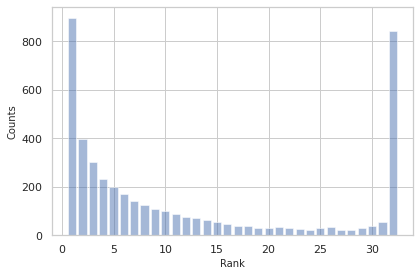

In [136]:
%autoreload
thresh=0.1
nbins=32
rank = reliability.Talagrand(thresh,nbins)
#for tii in [2,3,4,5,6]:
for tii in [7,8,9,10]:
    volcat = aeval.volcat_avg_hash[tii]
    forecast = aeval.cdump_hash[tii]
    dfin = rank.add_data_xra(volcat,forecast)
rank.plotrank()

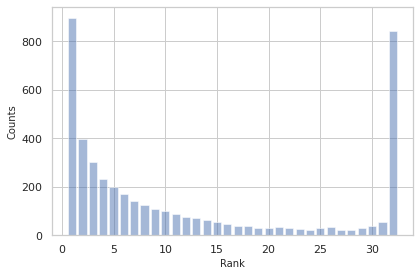

In [137]:
rank.plotrank()

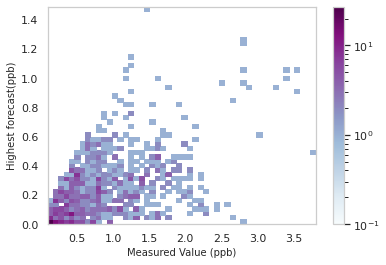

In [139]:
rank.check1()

In [66]:
forecast

<xarray.DataArray (ens: 31, y: 94, x: 71)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * y          (y) int64 392 393 394 395 396 397 398 ... 480 481 482 483 484 485
  * x          (x) int64 864 865 866 867 868 869 870 ... 929 930 931 932 933 934
    source     <U2 'M4'
    time       datetime64[ns] 2020-10-22T04:00:00
    latitude   (y, x) float64 50.08 50.08 50.08 50.08 ... 59.38 59.38 59.38
    longitude  (y, x) float64 156.9 157.0 157.1 157.2 ... 163.7 163.8 163.9
  * ens        (ens) object 'gep01' 'gep02' 'gep03' ... 'gep29' 'gep30' 'gec00'

In [98]:
v3 = volcat.expand_dims({'ens':['obs']})
dra = xr.concat([v3,forecast],dim='ens')

In [99]:
dra = dra.fillna(0)

In [100]:
dra = dra.drop('latitude')
dra = dra.drop('longitude')
dra

<xarray.DataArray 'ash_mass_loading' (ens: 32, y: 94, x: 71)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
    source   <U2 'M4'
    time     datetime64[ns] 2020-10-22T04:00:00
  * y        (y) int64 392 393 394 395 396 397 398 ... 480 481 482 483 484 485
  * x        (x) int64 864 865 866 867 868 869 870 ... 929 930 931 932 933 934
  * ens      (ens) object 'obs' 'gep01' 'gep02' ... 'gep29' 'gep30' 'gec00'

In [120]:
df = dra.to_dataframe()
df = df.reset_index()
def make_index(x):
    rval = '{}_{}'.format(x['y'],x['x'])
    return rval
#df['iii'] = df.apply(lambda row: make_index(row),axis=1)
df['iii'] = df.apply(lambda row: '{}_{}'.format(row['x'],row['y']),axis=1)
df
df2 = df.pivot(columns = 'ens', values='ash_mass_loading',index='iii')
df2

ens      gec00  gep01  gep02  gep03  gep04  gep05  gep06  gep07  gep08  gep09  \
iii                                                                             
864_392    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
864_393    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
864_394    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
864_395    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
864_396    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
934_481    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
934_482    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
934_483    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
934_484    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
934_485    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ens      ...  gep22  gep23  gep24  gep25  gep26  gep27  gep28  gep29  gep30  \
iii      ...                                                                  
864_392  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
864_393  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
864_394  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
864_395  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
864_396  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
934_481  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
934_482  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
934_483  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
934_484  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
934_485  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

ens      obs  
iii           
864_392  0.0  
864_393  0.0  
864_394  0.0  
864_395  0.0  
864_396  0.0  
...      ...  
934_481  0.0  
934_482  0.0  
934_483  0.0  
934_484  0.0  
934_485  0.0  

[6674 rows x 32 columns]

In [108]:
df3 = df[df['x']==864]
#df3
df3[df3['y']==392]
df

ens    y    x source                time  ash_mass_loading
0         obs  392  864     M4 2020-10-22 04:00:00               0.0
6674    gep01  392  864     M4 2020-10-22 04:00:00               0.0
13348   gep02  392  864     M4 2020-10-22 04:00:00               0.0
20022   gep03  392  864     M4 2020-10-22 04:00:00               0.0
26696   gep04  392  864     M4 2020-10-22 04:00:00               0.0
33370   gep05  392  864     M4 2020-10-22 04:00:00               0.0
40044   gep06  392  864     M4 2020-10-22 04:00:00               0.0
46718   gep07  392  864     M4 2020-10-22 04:00:00               0.0
53392   gep08  392  864     M4 2020-10-22 04:00:00               0.0
60066   gep09  392  864     M4 2020-10-22 04:00:00               0.0
66740   gep10  392  864     M4 2020-10-22 04:00:00               0.0
73414   gep11  392  864     M4 2020-10-22 04:00:00               0.0
80088   gep12  392  864     M4 2020-10-22 04:00:00               0.0
86762   gep13  392  864     M4 2020-10-22 04:00:00               0.0
93436   gep14  392  864     M4 2020-10-22 04:00:00               0.0
100110  gep15  392  864     M4 2020-10-22 04:00:00               0.0
106784  gep16  392  864     M4 2020-10-22 04:00:00               0.0
113458  gep17  392  864     M4 2020-10-22 04:00:00               0.0
120132  gep18  392  864     M4 2020-10-22 04:00:00               0.0
126806  gep19  392  864     M4 2020-10-22 04:00:00               0.0
133480  gep20  392  864     M4 2020-10-22 04:00:00               0.0
140154  gep21  392  864     M4 2020-10-22 04:00:00               0.0
146828  gep22  392  864     M4 2020-10-22 04:00:00               0.0
153502  gep23  392  864     M4 2020-10-22 04:00:00               0.0
160176  gep24  392  864     M4 2020-10-22 04:00:00               0.0
166850  gep25  392  864     M4 2020-10-22 04:00:00               0.0
173524  gep26  392  864     M4 2020-10-22 04:00:00               0.0
180198  gep27  392  864     M4 2020-10-22 04:00:00               0.0
186872  gep28  392  864     M4 2020-10-22 04:00:00               0.0
193546  gep29  392  864     M4 2020-10-22 04:00:00               0.0
200220  gep30  392  864     M4 2020-10-22 04:00:00               0.0
206894  gec00  392  864     M4 2020-10-22 04:00:00               0.0